<a href="https://colab.research.google.com/github/Nextc3/projeto_unidade9_regressao_linear/blob/main/Regressao_Linear_Influenciadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo deste projeto é desenvolver um modelo preditivo usando o algoritmo de
**Regressão Linear** para resolver um problema de **inferência sobre taxa de engajamento** dos
principais influenciadores do instagram. O projeto envolve desde a análise exploratória dos
dados até a otimização e validação do modelo. Trabalharemos para gerar inteligência para dois públicos: empresas e influenciadores.

Ao entender quais fatores influenciam a taxa de engajamento, as **empresas** podem escolher os influenciadores mais adequados para suas campanhas e alocar o orçamento de forma mais eficiente.

Ao identificar os principais determinantes da taxa de engajamento, os **influenciadores** podem otimizar suas estratégias de conteúdo e aumentar seu alcance e influência.

Variáveis originais

**rank**:
Definição: A posição do influenciador em um ranking, geralmente baseado no número de seguidores, engajamento ou influência geral. Um número menor indica maior influência.

**influence_score**:
Definição: Uma métrica que avalia a influência geral do influenciador. Esse escore pode levar em conta vários fatores, como número de seguidores, taxa de engajamento e outros indicadores de popularidade ou impacto nas redes sociais.

**posts**:
Definição: O número total de publicações feitas pelo influenciador na plataforma Instagram. Quanto maior o número de posts, maior a visibilidade do influenciador.

**followers**:
Definição: O número total de seguidores do influenciador no Instagram. É uma métrica fundamental para entender o alcance de suas publicações.

**avg_likes**:
Definição: O número médio de "curtidas" que o influenciador recebe por postagem. Essa variável pode indicar o nível de engajamento que as publicações estão gerando entre seus seguidores.

**60_day_eng_rate**:
Definição: A taxa de engajamento dos últimos 60 dias. Normalmente, é calculada como a média de interações (curtidas, comentários, etc.) em relação ao número de seguidores, mostrando o engajamento relativo do público com as postagens recentes do influenciador.

**new_post_avg_like**:
Definição: A média de "curtidas" recebidas nas postagens mais recentes do influenciador, ou seja, a média de curtidas nas publicações feitas mais recentemente (provavelmente uma média das últimas postagens).

**total_likes**:
Definição: O número total de "curtidas" recebidas pelo influenciador em todas as suas postagens. Essa métrica dá uma ideia do impacto geral das publicações do influenciador ao longo do tempo.

Variáveis derivadas

**likes_per_follower**:
Definição: A quantidade de "curtidas" que o influenciador recebe por seguidor. Essa métrica é uma maneira de avaliar a intensidade do engajamento em relação ao número de seguidores, mostrando quanto cada seguidor, em média, interage com as postagens.

**likes_per_post**:
Definição: A média de "curtidas" que o influenciador recebe por postagem. Esse valor ajuda a entender o engajamento por postagem e é uma métrica importante para avaliar o desempenho de um influenciador, considerando o número de postagens realizadas.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Função para converter strings com sufixos 'k', 'm', 'b' em valores numéricos
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        else:
            return float(value.replace(',', ''))
    return value

# Carregando o arquivo CSV (ajuste de caminho)
file_path = '/top_insta_influencers_data (1).csv'
df = pd.read_csv(file_path)

# Convertendo as colunas relevantes para numéricas
columns_to_convert = ['followers', 'avg_likes', 'total_likes', 'posts']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numeric)

# Corrigindo a conversão de '60_day_eng_rate' de percentual para número mantendo os valores originais
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)

# Garantindo que os valores da coluna '60_day_eng_rate' tenham 2 casas decimais
df['60_day_eng_rate'] = df['60_day_eng_rate'].round(2)  # Arredondando para 2 casas decimais

# Criando as variáveis secundárias 'likes_per_follower' e 'likes_per_post'
df['likes_per_follower'] = df['total_likes'] / df['followers']
df['likes_per_post'] = df['total_likes'] / df['posts']

# Verificando e tratando valores ausentes
df['country'] = df['country'].fillna('Desconhecido')  # Preenchendo valores ausentes na coluna 'country'
df = df.dropna(subset=['60_day_eng_rate'])  # Removendo linhas com valores ausentes em '60_day_eng_rate'

# Removendo as variáveis 'country' e 'channel_info' da análise de VIF
numeric_df = df[['followers', 'avg_likes', 'total_likes', 'posts', '60_day_eng_rate', 'likes_per_follower', 'likes_per_post']].dropna()
X = add_constant(numeric_df)
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print("Análise de VIF (sem 'country' e 'channel_info'):\n", vif_data)

# Ajustando a exibição de números para 2 casas decimais
pd.options.display.float_format = '{:,.2f}'.format

# Removendo as colunas 'country' e 'channel_info' da visualização do DataFrame
df_clean = df.drop(columns=['country', 'channel_info'])

# Visualizando as primeiras linhas do dataset após as conversões (sem 'country' e 'channel_info')
print("\nInício do dataset após as conversões (sem 'country' e 'channel_info'):")
print(df_clean.head())


Análise de VIF (sem 'country' e 'channel_info'):
              Variable   VIF
0               const  6.73
1           followers  3.10
2           avg_likes 69.97
3         total_likes  4.17
4               posts  1.62
5     60_day_eng_rate  5.08
6  likes_per_follower  2.54
7      likes_per_post 75.63

Início do dataset após as conversões (sem 'country' e 'channel_info'):
   rank  influence_score    posts      followers    avg_likes  \
0     1               92 3,300.00 475,800,000.00 8,700,000.00   
1     2               91 6,900.00 366,200,000.00 8,300,000.00   
2     3               90   890.00 357,300,000.00 6,800,000.00   
3     4               93 1,800.00 342,700,000.00 6,200,000.00   
4     5               91 6,800.00 334,100,000.00 1,900,000.00   

   60_day_eng_rate new_post_avg_like       total_likes  likes_per_follower  \
0             1.39              6.5m 29,000,000,000.00               60.95   
1             1.62              5.9m 57,400,000,000.00              156.74   
2

Foram eliminadas as variáveis 'country' e 'channel_info' e foram criadas mais duas a partir dos dados primários:

Agora temos 10 variáveis, sendo 8 primárias e 2 derivadas.

**originais:** rank,	influence_score,	posts,	followers,	avg_likes,	60_day_eng_rate,	new_post_avg_like e	total_likes	country*

**derivadas:** **likes_per_post e likes_per_follower **

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Carregando o arquivo CSV (ajuste de caminho)
file_path = '/top_insta_influencers_data (1).csv'
df = pd.read_csv(file_path)

# Convertendo as colunas relevantes para numéricas
columns_to_convert = ['followers', 'avg_likes', 'total_likes', 'posts', 'new_post_avg_like']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numeric)

# Corrigindo a conversão de '60_day_eng_rate' de percentual para número mantendo os valores originais
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)

# Garantindo que os valores da coluna '60_day_eng_rate' tenham 2 casas decimais
df['60_day_eng_rate'] = df['60_day_eng_rate'].round(2)

# Criando as variáveis secundárias 'likes_per_follower' e 'likes_per_post'
df['likes_per_follower'] = df['total_likes'] / df['followers']
df['likes_per_post'] = df['total_likes'] / df['posts']

# Removendo as variáveis 'country' e 'channel_info' para a análise de VIF
df_clean = df.drop(columns=['country', 'channel_info'])

# Selecionando as colunas numéricas para o cálculo do VIF
numeric_df = df_clean[['rank', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate',
                       'new_post_avg_like', 'total_likes', 'likes_per_follower', 'likes_per_post']]

# Verificando e tratando valores nulos ou infinitos
numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)  # Substituindo infinitos por NaN
numeric_df = numeric_df.dropna()  # Removendo linhas com valores NaN

# Adicionando uma constante (necessário para o cálculo do VIF)
X = add_constant(numeric_df)

# Calculando o VIF para cada variável
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Exibindo os resultados do VIF
print("Análise de VIF:")
print(vif_data)

# Identificando variáveis com VIF alto (geralmente VIF > 5 ou 10)
high_vif = vif_data[vif_data['VIF'] > 5]
print("\nVariáveis com VIF > 5 (potencial multicolinearidade):")
print(high_vif)


Análise de VIF:
              Variable    VIF
0                const 130.08
1                 rank   2.15
2      influence_score   1.24
3                posts   1.63
4            followers   5.23
5            avg_likes  95.59
6      60_day_eng_rate  17.41
7    new_post_avg_like  18.86
8          total_likes   4.53
9   likes_per_follower   2.61
10      likes_per_post  94.78

Variáveis com VIF > 5 (potencial multicolinearidade):
             Variable    VIF
0               const 130.08
4           followers   5.23
5           avg_likes  95.59
6     60_day_eng_rate  17.41
7   new_post_avg_like  18.86
10     likes_per_post  94.78


In [ ]:
# Visualizando as primeiras linhas do dataset após as conversões (sem 'country' e 'channel_info')
print("\nInício do dataset após as conversões (sem 'country' e 'channel_info'):")
print(df_clean.head())


Início do dataset após as conversões (sem 'country' e 'channel_info'):
   rank  influence_score    posts      followers    avg_likes  \
0     1               92 3,300.00 475,800,000.00 8,700,000.00   
1     2               91 6,900.00 366,200,000.00 8,300,000.00   
2     3               90   890.00 357,300,000.00 6,800,000.00   
3     4               93 1,800.00 342,700,000.00 6,200,000.00   
4     5               91 6,800.00 334,100,000.00 1,900,000.00   

   60_day_eng_rate  new_post_avg_like       total_likes  likes_per_follower  \
0             1.39       6,500,000.00 29,000,000,000.00               60.95   
1             1.62       5,900,000.00 57,400,000,000.00              156.74   
2             1.24       4,400,000.00  6,000,000,000.00               16.79   
3             0.97       3,300,000.00 11,500,000,000.00               33.56   
4             0.20         665,300.00 12,500,000,000.00               37.41   

   likes_per_post  
0    8,787,878.79  
1    8,318,840.58  
2 

In [ ]:
import itertools
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Função para converter strings com sufixos 'k', 'm', 'b' em valores numéricos
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        else:
            return float(value.replace(',', ''))
    return value

# Carregando o arquivo CSV (ajuste de caminho)
file_path = '/top_insta_influencers_data (1).csv'
df = pd.read_csv(file_path)

# Convertendo as colunas relevantes para numéricas
columns_to_convert = ['followers', 'avg_likes', 'total_likes', 'posts', 'new_post_avg_like']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numeric)

# Corrigindo a conversão de '60_day_eng_rate' de percentual para número mantendo os valores originais
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)

# Garantindo que os valores da coluna '60_day_eng_rate' tenham 2 casas decimais
df['60_day_eng_rate'] = df['60_day_eng_rate'].round(2)

# Criando as variáveis secundárias 'likes_per_follower' e 'likes_per_post'
df['likes_per_follower'] = df['total_likes'] / df['followers']
df['likes_per_post'] = df['total_likes'] / df['posts']

# Removendo as variáveis 'country' e 'channel_info' para a análise de VIF
df_clean = df.drop(columns=['country', 'channel_info'])

# Selecionando as colunas numéricas para o cálculo do VIF (sem a variável dependente '60_day_eng_rate')
numeric_df = df_clean[['rank', 'influence_score', 'posts', 'followers', 'avg_likes',
                       'new_post_avg_like', 'total_likes', 'likes_per_follower', 'likes_per_post']]

# Verificando e tratando valores nulos ou infinitos
numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)  # Substituindo infinitos por NaN
numeric_df = numeric_df.dropna()  # Removendo linhas com valores NaN

# Função para calcular o VIF de um DataFrame
def calculate_vif(dataframe):
    X = add_constant(dataframe)  # Adiciona a constante (intercepto)
    vif_data = pd.DataFrame({
        'Variable': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })
    return vif_data

# Função para realizar a análise de VIF após a remoção de variáveis
def vif_analysis_after_removal(numeric_df, variables_to_remove):
    reduced_df = numeric_df.drop(columns=list(variables_to_remove))  # Corrigido para garantir que variáveis sejam passadas como lista
    vif_data = calculate_vif(reduced_df)
    high_vif_vars = vif_data[vif_data['VIF'] > 10]  # Filtra as variáveis com VIF acima de 10
    return vif_data, high_vif_vars

# Listando todas as variáveis (sem a constante)
variables = ['rank', 'influence_score', 'posts', 'followers', 'avg_likes',
             'new_post_avg_like', 'total_likes', 'likes_per_follower', 'likes_per_post']

# Vamos gerar combinações de remoção de variáveis em 1, 2, 3 e 4 variáveis
best_results = []

# 1. Teste removendo 1 variável de cada vez
for i in range(1, 2):  # Tamanho da combinação = 1
    for combo in itertools.combinations(variables, i):
        vif_data, high_vif_vars = vif_analysis_after_removal(numeric_df, combo)
        if len(high_vif_vars) == 0:  # Se não há variáveis com VIF > 10
            best_results.append({
                'removed_variables': combo,
                'num_remaining_variables': len(vif_data) - 1,
                'vif_data': vif_data
            })

# 2. Teste removendo 2 variáveis de cada vez
for i in range(2, 3):  # Tamanho da combinação = 2
    for combo in itertools.combinations(variables, i):
        vif_data, high_vif_vars = vif_analysis_after_removal(numeric_df, combo)
        if len(high_vif_vars) == 0:  # Se não há variáveis com VIF > 10
            best_results.append({
                'removed_variables': combo,
                'num_remaining_variables': len(vif_data) - 1,
                'vif_data': vif_data
            })

# 3. Teste removendo 3 variáveis de cada vez
for i in range(3, 4):  # Tamanho da combinação = 3
    for combo in itertools.combinations(variables, i):
        vif_data, high_vif_vars = vif_analysis_after_removal(numeric_df, combo)
        if len(high_vif_vars) == 0:  # Se não há variáveis com VIF > 10
            best_results.append({
                'removed_variables': combo,
                'num_remaining_variables': len(vif_data) - 1,
                'vif_data': vif_data
            })

# 4. Teste removendo 4 variáveis de cada vez
for i in range(4, 5):  # Tamanho da combinação = 4
    for combo in itertools.combinations(variables, i):
        vif_data, high_vif_vars = vif_analysis_after_removal(numeric_df, combo)
        if len(high_vif_vars) == 0:  # Se não há variáveis com VIF > 10
            best_results.append({
                'removed_variables': combo,
                'num_remaining_variables': len(vif_data) - 1,
                'vif_data': vif_data
            })

# Exibindo os melhores resultados
best_results_sorted = sorted(best_results, key=lambda x: x['num_remaining_variables'], reverse=True)

# Mostrar os resultados mais promissores
for result in best_results_sorted:
    print(f"Removendo variáveis: {result['removed_variables']}")
    print(f"Variáveis restantes: {result['num_remaining_variables']}")
    print(result['vif_data'][['Variable', 'VIF']])
    print("\n" + "="*50 + "\n")


Removendo variáveis: ('rank', 'influence_score', 'avg_likes')
Variáveis restantes: 6
             Variable  VIF
0               const 6.70
1               posts 1.47
2           followers 2.68
3   new_post_avg_like 3.80
4         total_likes 3.88
5  likes_per_follower 2.37
6      likes_per_post 3.90


Removendo variáveis: ('rank', 'influence_score', 'likes_per_post')
Variáveis restantes: 6
             Variable  VIF
0               const 6.73
1               posts 1.51
2           followers 2.69
3           avg_likes 3.93
4   new_post_avg_like 3.58
5         total_likes 3.90
6  likes_per_follower 2.35


Removendo variáveis: ('influence_score', 'followers', 'avg_likes')
Variáveis restantes: 6
             Variable  VIF
0               const 9.30
1                rank 1.38
2               posts 1.46
3   new_post_avg_like 3.88
4         total_likes 2.09
5  likes_per_follower 1.72
6      likes_per_post 3.92


Removendo variáveis: ('influence_score', 'followers', 'likes_per_post')
Variáveis

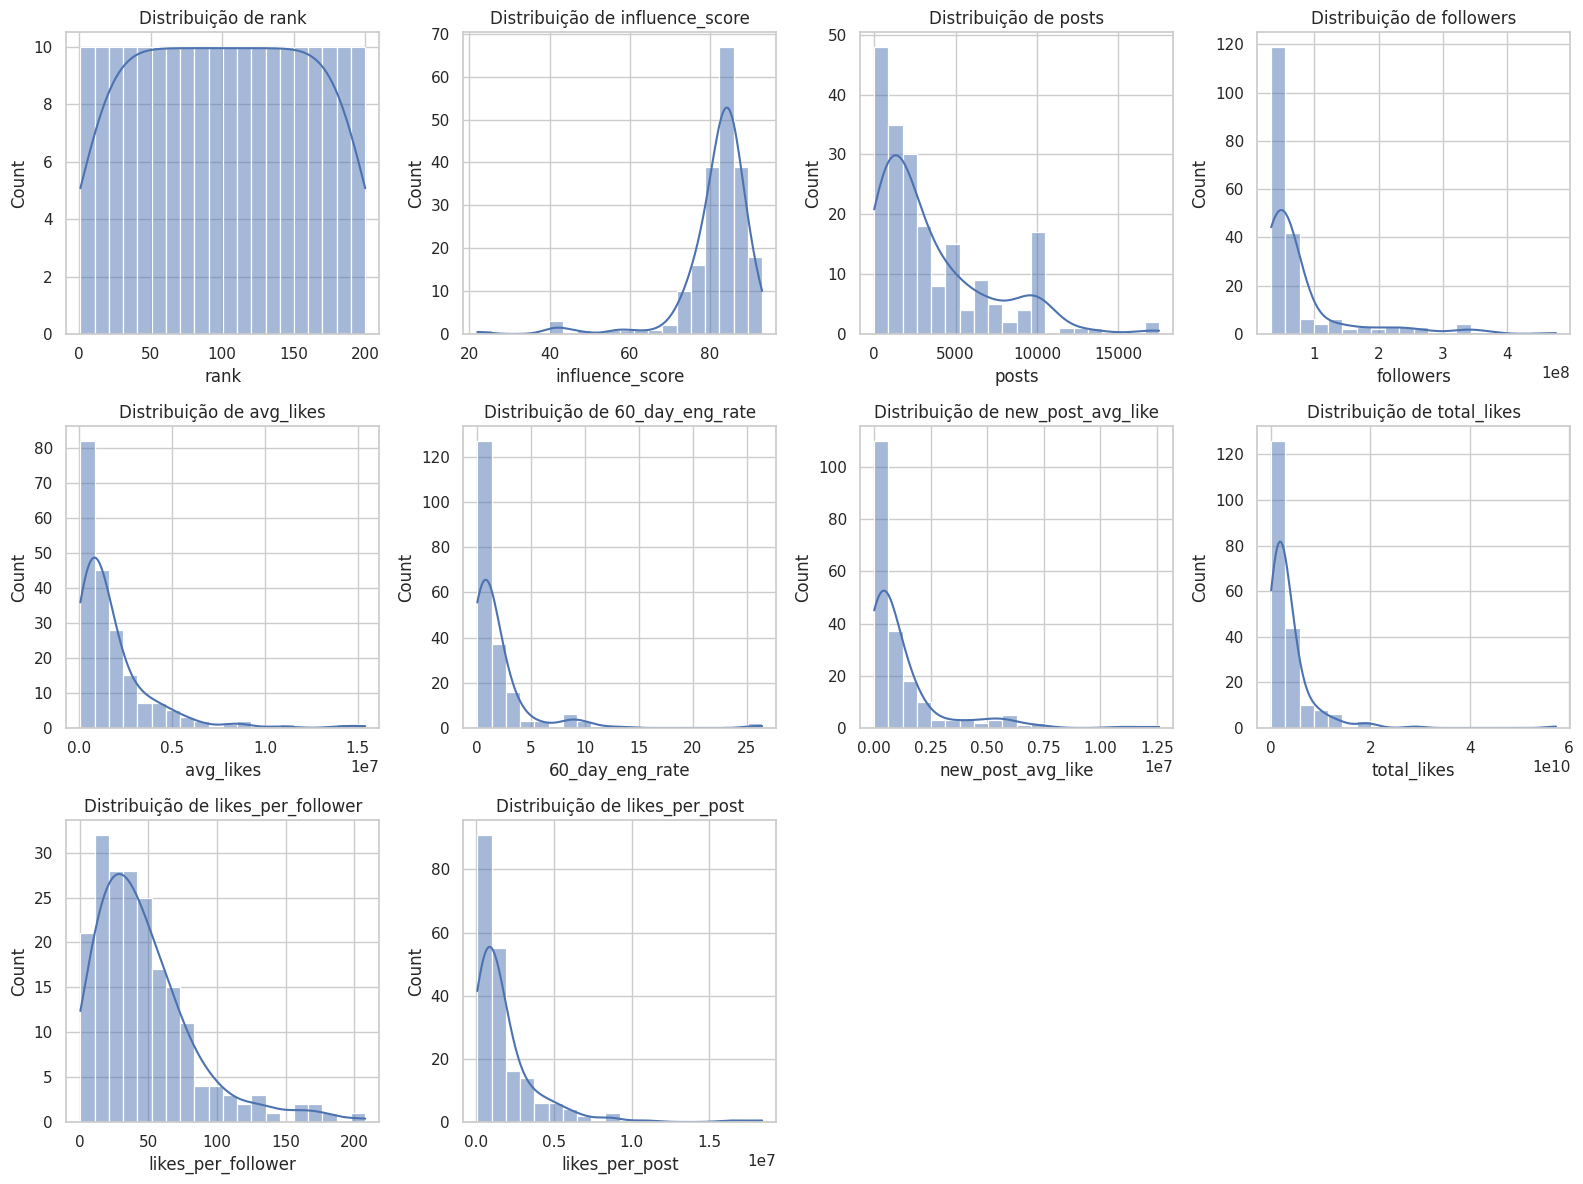

<Figure size 1200x1000 with 0 Axes>

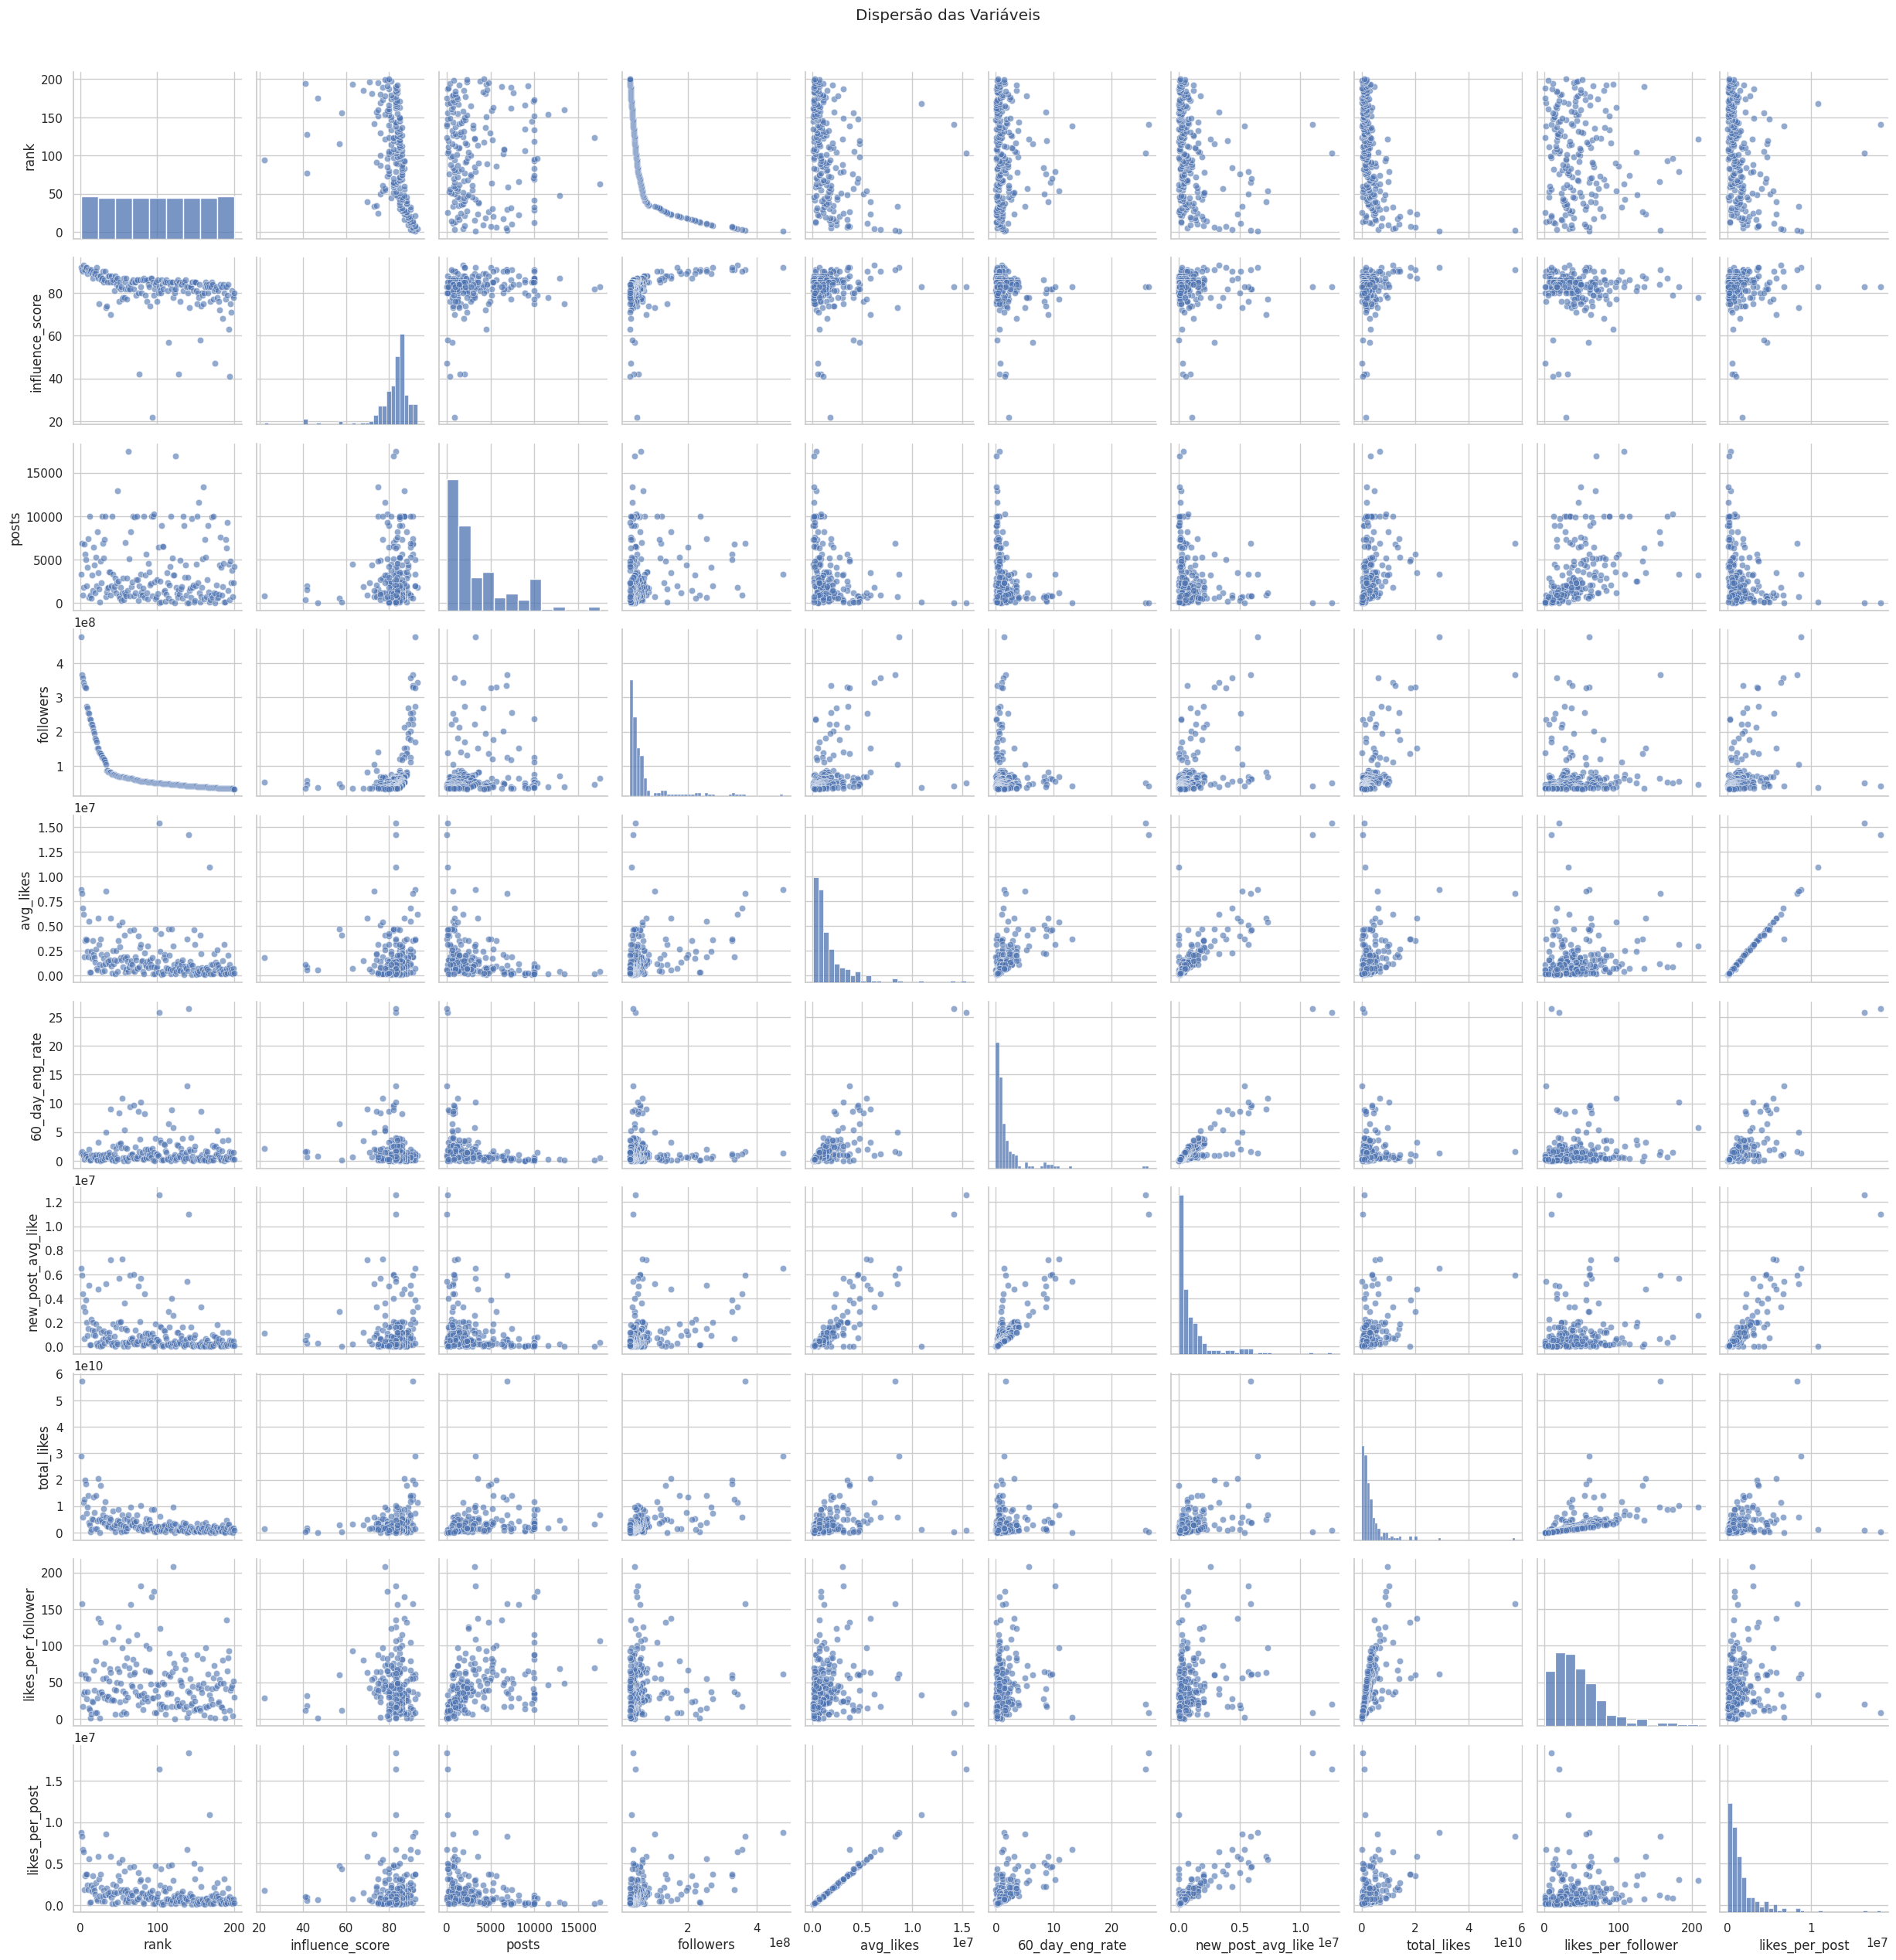

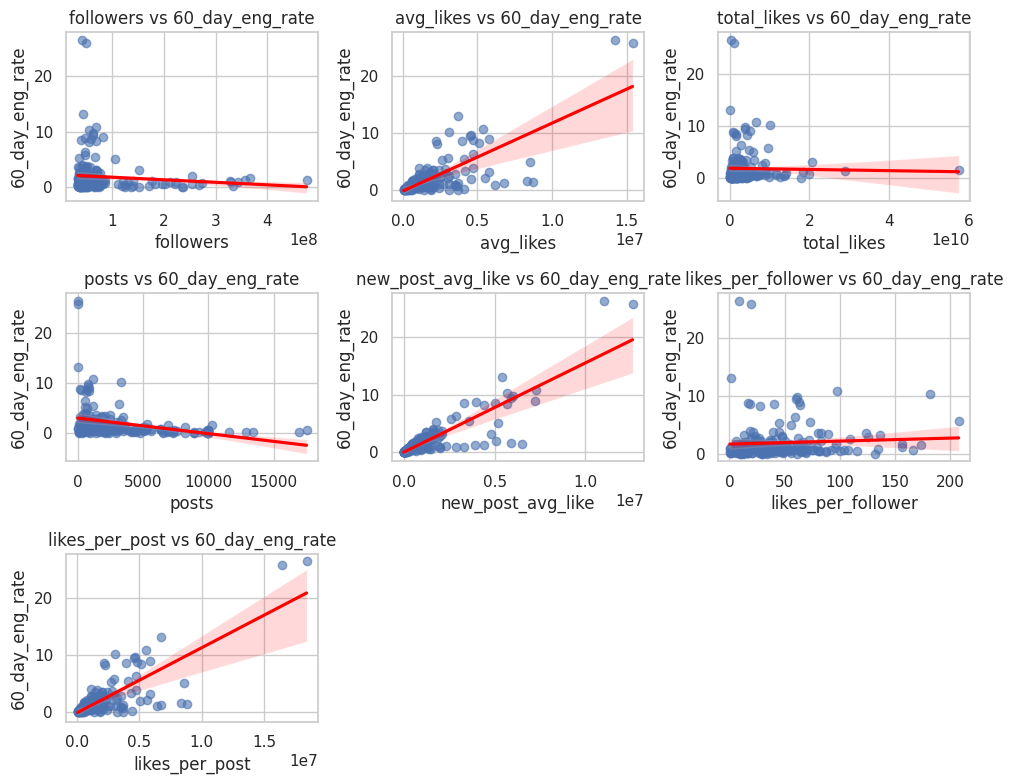

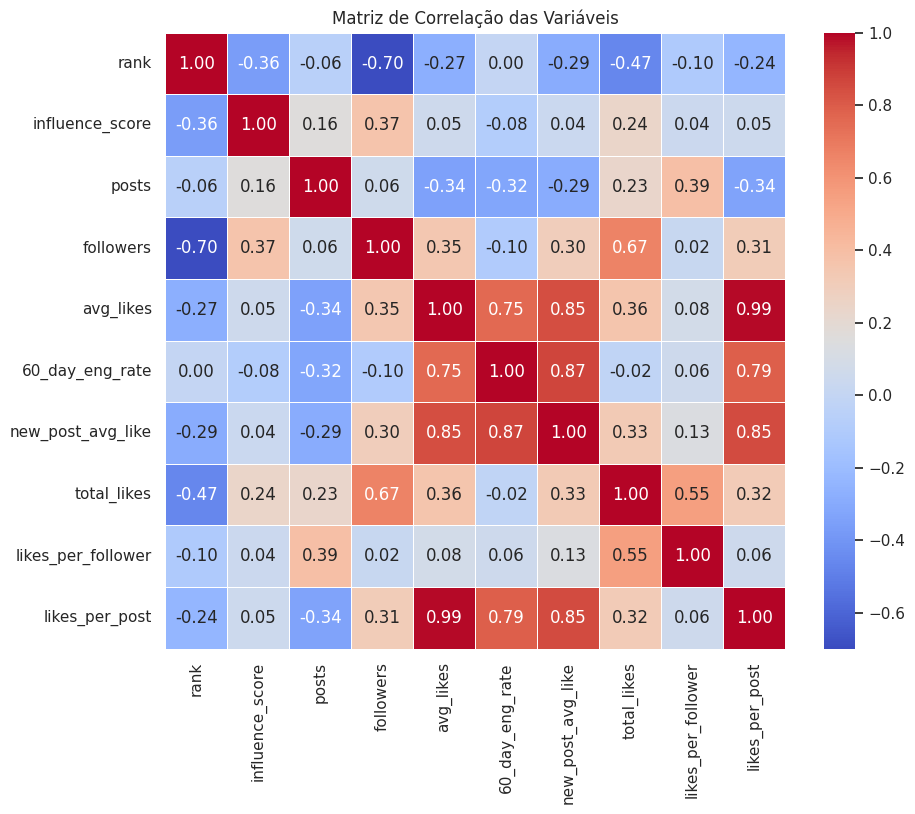


Verificando valores nulos no DataFrame:
rank                  0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       1
new_post_avg_like     0
total_likes           0
likes_per_follower    0
likes_per_post        0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# Carregando o arquivo CSV (ajuste de caminho)
file_path = '/top_insta_influencers_data (1).csv'
df = pd.read_csv(file_path)

# Convertendo as colunas relevantes para numéricas
columns_to_convert = ['followers', 'avg_likes', 'total_likes', 'posts', 'new_post_avg_like']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numeric)

# Corrigindo a conversão de '60_day_eng_rate' de percentual para número mantendo os valores originais
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)

# Garantindo que os valores da coluna '60_day_eng_rate' tenham 2 casas decimais
df['60_day_eng_rate'] = df['60_day_eng_rate'].round(2)

# Criando as variáveis secundárias 'likes_per_follower' e 'likes_per_post'
df['likes_per_follower'] = df['total_likes'] / df['followers']
df['likes_per_post'] = df['total_likes'] / df['posts']

# Removendo as variáveis 'country' e 'channel_info' para a visualização
df_clean = df.drop(columns=['country', 'channel_info'])

# 1. **Distribuição das Variáveis** (Histogramas)
plt.figure(figsize=(16, 12))
for i, column in enumerate(df_clean.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_clean[column], kde=True, bins=20)
    plt.title(f'Distribuição de {column}')
plt.tight_layout()
plt.show()

# 2. **Dispersão das Variáveis** (Gráficos de Dispersão)
plt.figure(figsize=(12, 10))
sns.pairplot(df_clean, kind='scatter', diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Dispersão das Variáveis', y=1.02)
plt.show()

# 3. **Dispersão com Regressão Linear** (focando em '60_day_eng_rate')
# Ajustando um modelo de regressão linear para '60_day_eng_rate' como variável dependente
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Variáveis independentes a serem testadas contra '60_day_eng_rate'
independent_vars = ['followers', 'avg_likes', 'total_likes', 'posts', 'new_post_avg_like', 'likes_per_follower', 'likes_per_post']

for i, var in enumerate(independent_vars):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=var, y='60_day_eng_rate', data=df_clean, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
    plt.title(f'{var} vs 60_day_eng_rate')

plt.tight_layout()
plt.show()

# 4. **Matriz de Correlação** (Mapa de Calor)
plt.figure(figsize=(10, 8))
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# Verificando a presença de valores nulos no DataFrame
print("\nVerificando valores nulos no DataFrame:")
print(df_clean.isnull().sum())

Variáveis com alta correlação positiva com **60_day_eng_rate**:

**avg_likes**: A média de likes por post tem uma forte correlação positiva com a taxa de engajamento nos últimos 60 dias.

**new_post_avg_like**: A média de likes nos novos posts também apresenta uma alta correlação.

**total_likes**: O número total de likes tem uma correlação moderadamente alta.


Procuramos por variáveis que apresentem uma correlação razoável com a variável dependente (60_day_eng_rate) e que não sejam altamente correlacionadas com as outras variáveis independentes já selecionadas.

As variáveis avg_likes, new_post_avg_like e total_likes estão altamente correlacionadas entre si. Isso indica a presença de multicolinearidade. Algumas técnicas para reduzí-la:

**Regulariação**:

*Ridge regression:* Adiciona uma penalidade à soma dos quadrados dos coeficientes, diminuindo a magnitude dos coeficientes e tornando o modelo mais robusto à multicolinearidade.

*Lasso regression:* Similar ao Ridge, mas com uma penalidade que pode levar a coeficientes iguais a zero, realizando uma seleção de variáveis automática.

*Elastic Net:* Combina as características do Ridge e Lasso, oferecendo um bom equilíbrio entre as duas técnicas.


**Análise de Componentes Principais (PCA):** Transforma as variáveis originais em um novo conjunto de variáveis não correlacionadas, chamadas de componentes principais.

**Modelos de Equações Estruturais (SEM):** Permitem modelar relações complexas entre variáveis latentes e observadas, sendo particularmente úteis em casos de alta multicolinearidade.


Existem 1 valores nulos em '60_day_eng_rate'.
Resultado do Elastic Net:
Intercepto: 1.856043165467626
Coeficientes: [ 0.73457832  1.34138279 -0.25430864]
MSE: 1.9235507472016415
Resultado do Ridge:
Intercepto: 1.856043165467626
Coeficientes: [ 0.1743149   3.34978922 -1.30974304]
MSE: 0.8017587713841355
Resultado do Lasso:
Intercepto: 1.856043165467626
Coeficientes: [ 0.          3.38537741 -1.16161526]
MSE: 0.7540743357099904


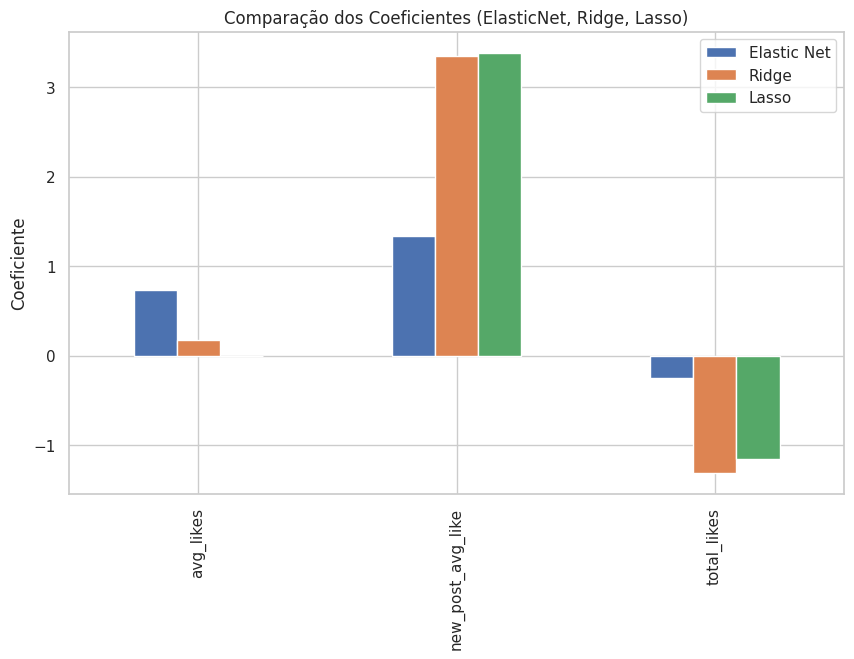

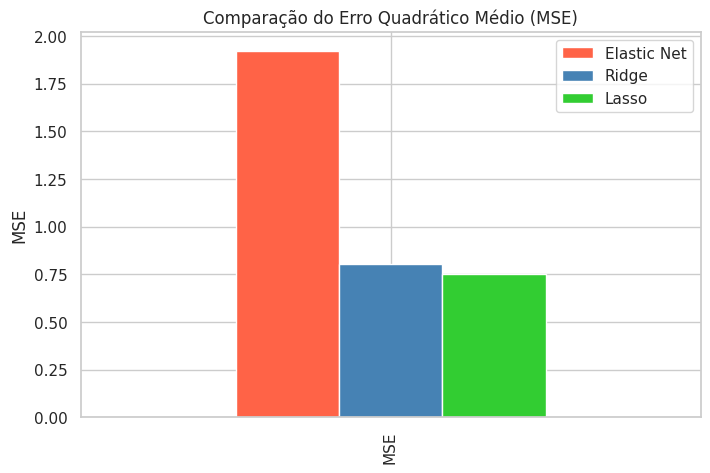

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carregar o arquivo CSV (ajuste de caminho)
file_path = '/top_insta_influencers_data (1).csv'
df = pd.read_csv(file_path)

# Convertendo colunas relevantes para numéricas (como já feito anteriormente)
columns_to_convert = ['followers', 'avg_likes', 'total_likes', 'posts', 'new_post_avg_like', 'influence_score']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numeric)

# Garantindo que os valores da coluna '60_day_eng_rate' tenham 2 casas decimais
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)
df['60_day_eng_rate'] = df['60_day_eng_rate'].round(2)

# Verificando se há valores nulos em y (60_day_eng_rate)
if df['60_day_eng_rate'].isnull().sum() > 0:
    print(f"Existem {df['60_day_eng_rate'].isnull().sum()} valores nulos em '60_day_eng_rate'.")
    # Remover linhas com valores nulos em '60_day_eng_rate'
    df = df.dropna(subset=['60_day_eng_rate'])

# Selecionando as variáveis para modelagem
X = df[['avg_likes', 'new_post_avg_like', 'total_likes']]
y = df['60_day_eng_rate']  # Usaremos '60_day_eng_rate' como variável dependente

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados (necessário para as regularizações)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializando os modelos de regularização
models = {
    "Elastic Net": ElasticNet(alpha=1.0, l1_ratio=0.5),  # Ajuste do parâmetro alpha e l1_ratio (0.5 é um meio-termo)
    "Ridge": Ridge(alpha=1.0),  # Regularização L2
    "Lasso": Lasso(alpha=0.1)  # Regularização L1
}

# Armazenando resultados
results = {}

# Treinando e avaliando os modelos
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculando o erro quadrático médio (MSE) para cada modelo
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = {
        "Model": model,
        "MSE": mse,
        "Coefficients": model.coef_,
        "Intercept": model.intercept_
    }

# Visualizando os resultados
for model_name, result in results.items():
    print(f"Resultado do {model_name}:")
    print(f"Intercepto: {result['Intercept']}")
    print(f"Coeficientes: {result['Coefficients']}")
    print(f"MSE: {result['MSE']}")
    print("="*50)

# Visualizando os coeficientes dos modelos
coef_df = pd.DataFrame({
    "Elastic Net": results["Elastic Net"]["Coefficients"],
    "Ridge": results["Ridge"]["Coefficients"],
    "Lasso": results["Lasso"]["Coefficients"]
}, index=X.columns)

coef_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação dos Coeficientes (ElasticNet, Ridge, Lasso)')
plt.ylabel('Coeficiente')
plt.show()

# Visualizando o MSE para cada modelo
mse_df = pd.DataFrame({
    "Elastic Net": [results["Elastic Net"]["MSE"]],
    "Ridge": [results["Ridge"]["MSE"]],
    "Lasso": [results["Lasso"]["MSE"]]
}, index=["MSE"])

mse_df.plot(kind='bar', figsize=(8, 5), color=['#FF6347', '#4682B4', '#32CD32'])
plt.title('Comparação do Erro Quadrático Médio (MSE)')
plt.ylabel('MSE')
plt.show()


O modelo **Lasso** parece ser o mais eficaz para esse conjunto de dados, pois conseguiu reduzir a complexidade do modelo ao "eliminar" a variável avg_likes e obteve o menor erro.

O **Ridge**, ao contrário, manteve todas as variáveis no modelo e ajustou seus coeficientes, mas obteve um MSE um pouco mais alto.

**O Elastic Net** mostrou que as regularizações L1 e L2 têm um efeito mais moderado em relação ao Ridge e Lasso, mas não foi tão eficaz quanto o Lasso.

Valores nulos antes de qualquer limpeza:
rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

Valores nulos após limpeza:
rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              61
dtype: int64

Coeficientes: [ 0.00473139  3.27567744 -1.11911972]
Intercepto: 1.8810691823899375
Erro Quadrático Médio (MSE): 0.7181876415858989
Coeficiente de Determinação (R²): 0.8835575941204573


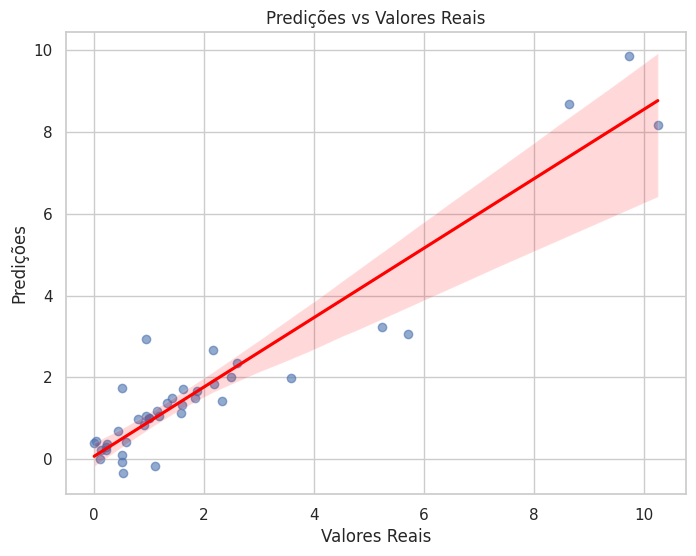


Coeficientes das Variáveis:
            Variável  Coeficiente
0          avg_likes         0.00
1  new_post_avg_like         3.28
2        total_likes        -1.12


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Função para converter strings com abreviações como 'k', 'm' para números
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value.lower():
            return float(value.lower().replace('k', '').strip()) * 1000
        elif 'm' in value.lower():
            return float(value.lower().replace('m', '').strip()) * 1000000
        elif 'b' in value.lower():
            return float(value.lower().replace('b', '').strip()) * 1000000000
        else:
            # Caso não seja 'k', 'm' ou 'b', tentar converter diretamente
            return pd.to_numeric(value, errors='coerce')
    return value

# Carregar o dataset (ajustar caminho se necessário)
file_path = '/top_insta_influencers_data (1).csv'
df = pd.read_csv(file_path)

# Verificar se há valores nulos nas colunas antes de começar
print("Valores nulos antes de qualquer limpeza:")
print(df.isnull().sum())

# Converter as colunas relevantes para numéricas, incluindo tratamento de 'k', 'm', e 'b'
columns_to_convert = ['followers', 'avg_likes', 'total_likes', 'posts', 'new_post_avg_like']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numeric)

# Corrigir a conversão de '60_day_eng_rate' de percentual para número (eliminar '%')
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)

# Garantir que a coluna de '60_day_eng_rate' tenha duas casas decimais e trate valores nulos
df['60_day_eng_rate'] = df['60_day_eng_rate'].round(2)

# Remover valores nulos (caso existam)
df.dropna(subset=['followers', 'avg_likes', 'total_likes', 'posts', 'new_post_avg_like', '60_day_eng_rate'], inplace=True)

# Verificar novamente se há valores nulos após a limpeza
print("\nValores nulos após limpeza:")
print(df.isnull().sum())

# Criar as variáveis independentes e dependentes
X = df[['avg_likes', 'new_post_avg_like', 'total_likes']]
y = df['60_day_eng_rate']

# Garantir que X e y tenham o mesmo número de registros após o drop de nulos
X = X.loc[y.index]

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar as variáveis para que todas tenham a mesma escala (importante para regularização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir o modelo Lasso (com parâmetro alpha - regularização)
lasso = Lasso(alpha=0.1)  # alpha controla a força da regularização (ajustar conforme necessário)

# Treinar o modelo Lasso
lasso.fit(X_train_scaled, y_train)

# Fazer previsões com o conjunto de teste
y_pred = lasso.predict(X_test_scaled)

# Avaliar o modelo: calcular o MSE e o R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print(f"\nCoeficientes: {lasso.coef_}")
print(f"Intercepto: {lasso.intercept_}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

# Visualizar os resultados - gráfico de dispersão das previsões vs valores reais
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Predições vs Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.show()

# Visualizar os coeficientes de forma mais compreensível
coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': lasso.coef_
})
print("\nCoeficientes das Variáveis:")
print(coef_df)


**MSE** (Erro Quadrático Médio): **0.7182**: O MSE mede a diferença média ao quadrado entre as previsões e os valores reais. Quanto menor o valor, melhor o modelo se ajusta aos dados. Um MSE de 0.718 é relativamente baixo, sugerindo que o modelo tem um bom ajuste.

**R²** (Coeficiente de Determinação): **0.8836**: O R² é uma medida de quão bem os dados são explicados pelo modelo. Um R² de 88.36% é excelente e indica que o modelo consegue explicar a grande maioria da variação em 60_day_eng_rate com as três variáveis independentes.

Coeficientes das variáveis independentes:

**avg_likes**: 0.00: O coeficiente de avg_likes é muito próximo de zero, o que indica que esta variável tem pouca ou nenhuma influência sobre o 60_day_eng_rate no modelo Lasso, possivelmente devido à regularização (Lasso tende a reduzir coeficientes a zero quando uma variável não contribui de forma significativa para o modelo).

**new_post_avg_like**: 3.28: O coeficiente de new_post_avg_like é positivo e significativo. Isso sugere que um aumento nos "likes por novo post" está associado a um aumento no 60_day_eng_rate. Em outras palavras, influenciadores que recebem mais likes em seus novos posts tendem a ter uma maior taxa de engajamento nos últimos 60 dias.

**total_likes**: -1.12: O coeficiente de total_likes é negativo. Isso sugere que um aumento no número total de likes está associado a uma diminuição no 60_day_eng_rate. Embora esse resultado possa parecer contra-intuitivo, pode ser que influenciadores com mais seguidores, ou com posts antigos, recebam um grande número de likes, mas com uma taxa de engajamento inferior.

Melhor valor de alpha: 0.1

Coeficientes após ajuste de alpha (Lasso):
                   Coeficiente
avg_likes                 0.00
new_post_avg_like         3.28
total_likes              -1.12

Erro Quadrático Médio (MSE): 0.7181876415858989
Coeficiente de Determinação (R²): 0.8835575941204573


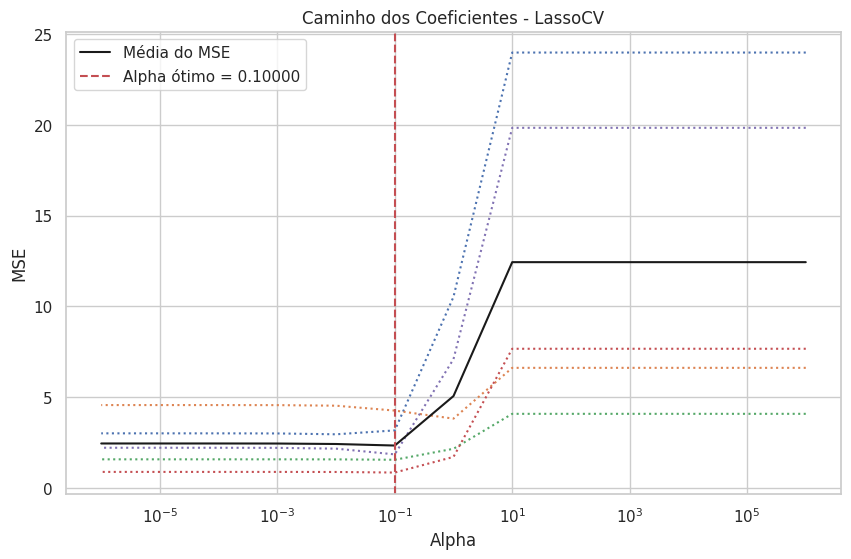

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supondo que os dados já estejam tratados e prontos
# X = features (avg_likes, new_post_avg_like, total_likes)
# y = target (60_day_eng_rate)

# Selecionando as variáveis
X = df_clean[['avg_likes', 'new_post_avg_like', 'total_likes']]
y = df_clean['60_day_eng_rate']

# Remover valores nulos de X e y (caso existam)
X = X[~y.isna()]
y = y.dropna()

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializando o LassoCV (Lasso com validação cruzada para escolher alpha)
lasso = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, max_iter=10000)

# Treinando o modelo LassoCV
lasso.fit(X_train_scaled, y_train)

# Melhor valor de alpha
best_alpha = lasso.alpha_
print(f"Melhor valor de alpha: {best_alpha}")

# Coeficientes após a regularização com o melhor alpha
coef = pd.DataFrame(lasso.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes após ajuste de alpha (Lasso):")
print(coef)

# Previsões no conjunto de teste
y_pred = lasso.predict(X_test_scaled)

# Avaliação do modelo
mse = np.mean((y_test - y_pred)**2)
r2 = lasso.score(X_test_scaled, y_test)

print(f"\nErro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

# Plotando o caminho dos coeficientes em função dos valores de alpha
plt.figure(figsize=(10, 6))
plt.plot(lasso.alphas_, lasso.mse_path_, ':')
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=-1), 'k', label='Média do MSE')
plt.axvline(best_alpha, linestyle='--', color='r', label=f'Alpha ótimo = {best_alpha:.5f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.title('Caminho dos Coeficientes - LassoCV')
plt.show()


Com o ajuste de **alpha em 0.1**, o modelo Lasso foi capaz de regularizar as variáveis de maneira eficaz, **eliminando a variável avg_likes** , que não tem contribuição significativa.

O modelo consegue prever a variável de **taxa de engajamento** com um erro razoavelmente baixo **(MSE de 0.718)** e uma boa capacidade de explicação dos dados **(R² de 0.884)**.

As variáveis **new_post_avg_like** e **total_likes** continuam a ter um impacto significativo na previsão, com **new_post_avg_like** apresentando uma relação positiva com a **taxa de engajamento** e **total_likes** uma relação negativa.

Quero usar algumas **técnicas de otimização** e ver o resultado após cada uma delas:

*   Mínimos quadrados.
*   Gradiente descendente.
*   A taxa de aprendizado (hiperparâmetro).
*   O número de épocas (hiperparâmetro).
*   Normalização dos dados.
*   Padronização dos dados.
*   Validação cruzada.










Coeficientes após validação cruzada (Lasso):
                   Coeficiente
avg_likes                 0.00
new_post_avg_like         3.28
total_likes              -1.12


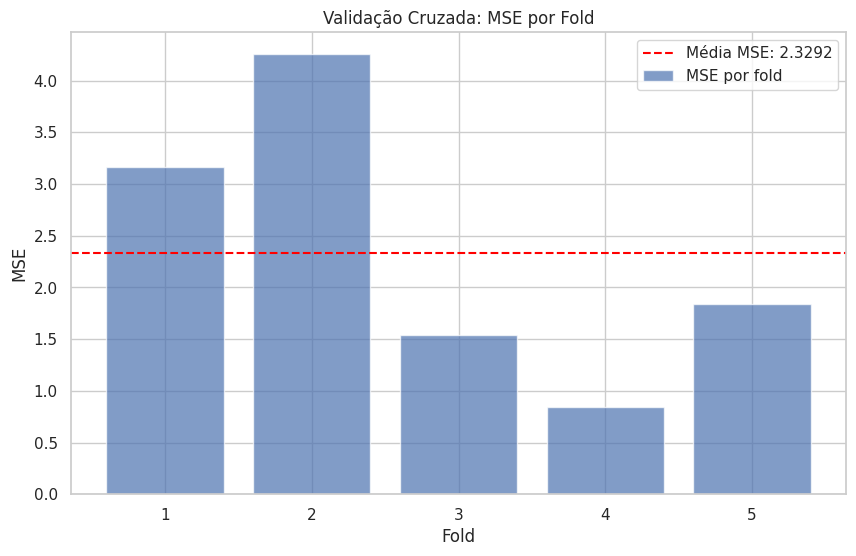


Erro Quadrático Médio (MSE): 0.7181876415858989
Coeficiente de Determinação (R²): 0.8835575941204573
Erro Absoluto Médio (MAE): 0.52689611311899


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd

# Inicializando o modelo LassoCV com a escolha de alphas e validação cruzada
lasso = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, max_iter=10000)

# Treinando com o LassoCV no conjunto de treinamento
lasso.fit(X_train_scaled, y_train)

# Coeficientes após ajuste de alpha
coef = pd.DataFrame(lasso.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes após validação cruzada (Lasso):")
print(coef)

# Realizando a validação cruzada
cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculando a média e o desvio padrão do MSE
cv_mse = -cv_scores  # MSE é negativo porque o cross_val_score usa o sinal negativo para minimizar
mean_cv_mse = np.mean(cv_mse)
std_cv_mse = np.std(cv_mse)

# Visualizando os resultados do MSE de cada fold da validação cruzada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_mse, alpha=0.7, label="MSE por fold")
plt.axhline(mean_cv_mse, color='red', linestyle='--', label=f'Média MSE: {mean_cv_mse:.4f}')
plt.title('Validação Cruzada: MSE por Fold')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Avaliação final do modelo
y_pred = lasso.predict(X_test_scaled)
mse = np.mean((y_test - y_pred)**2)
r2 = lasso.score(X_test_scaled, y_test)
mae = np.mean(np.abs(y_test - y_pred))

print(f"\nErro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")
print(f"Erro Absoluto Médio (MAE): {mae}")


![image.png](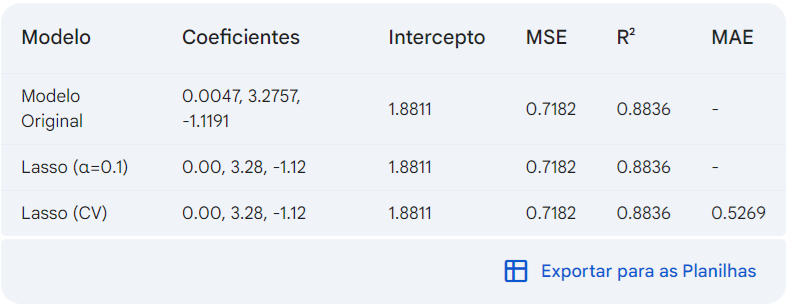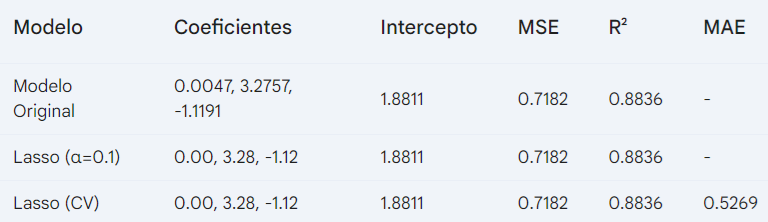)

**Seleção de Variáveis**: A regularização Lasso foi eficaz em identificar a variável avg_likes como menos relevante para o modelo, eliminando-a dos coeficientes. Isso sugere que a multicolinearidade entre as variáveis estava afetando a interpretação dos coeficientes originais.

**Desempenho do Modelo**: O modelo após a aplicação do Lasso apresentou um desempenho similar ao modelo original em termos de MSE e R², indicando que a remoção da variável avg_likes não prejudicou significativamente a capacidade do modelo de explicar a variabilidade da variável dependente.

**Validação Cruzada**: A validação cruzada confirmou os resultados obtidos com o ajuste do parâmetro α, indicando que o modelo generaliza bem para novos dados.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Carregar e preparar os dados
X = df_clean[['avg_likes', 'new_post_avg_like', 'total_likes']]
y = df_clean['60_day_eng_rate']

# Remover valores nulos
X = X[~y.isna()]
y = y.dropna()

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializando o SGDRegressor (Gradiente Descendente)
sgd = SGDRegressor(max_iter=1000, penalty=None, eta0=0.01, learning_rate='constant')

# Treinando o modelo
sgd.fit(X_train_scaled, y_train)

# Coeficientes do modelo
coef_sgd = pd.DataFrame(sgd.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes após Gradiente Descendente:")
print(coef_sgd)

# Avaliação do modelo
y_pred_sgd = sgd.predict(X_test_scaled)
mse_sgd = np.mean((y_test - y_pred_sgd)**2)
r2_sgd = sgd.score(X_test_scaled, y_test)

print(f"\nErro Quadrático Médio (MSE) - Gradiente Descendente: {mse_sgd}")
print(f"Coeficiente de Determinação (R²) - Gradiente Descendente: {r2_sgd}")



Coeficientes após Gradiente Descendente:
                   Coeficiente
avg_likes                 0.58
new_post_avg_like         3.03
total_likes              -1.47

Erro Quadrático Médio (MSE) - Gradiente Descendente: 0.9243343298721225
Coeficiente de Determinação (R²) - Gradiente Descendente: 0.850134272751209


Melhor Taxa de Aprendizado: 0.01
Melhor Número de Épocas: 5000

Coeficientes do modelo Gradiente Descendente (SGD):
                   Coeficiente
avg_likes                 0.47
new_post_avg_like         3.05
total_likes              -1.41


<Figure size 800x600 with 0 Axes>

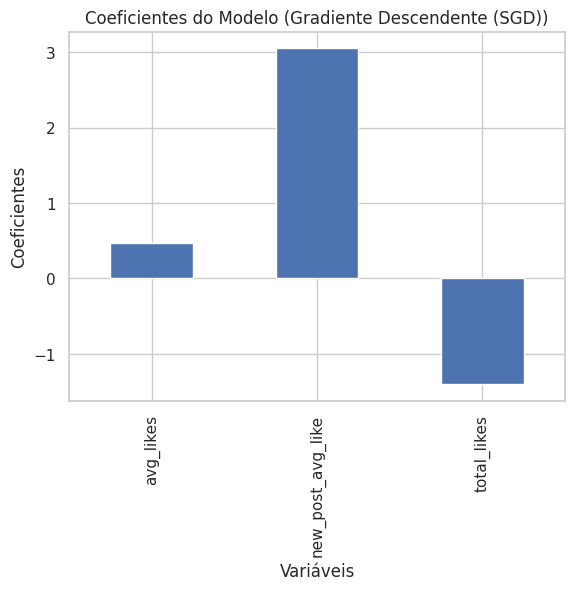


MSE (Gradiente Descendente (SGD)): 0.8614
R² (Gradiente Descendente (SGD)): 0.8603
--------------------------------------------------

Coeficientes do modelo Mínimos Quadrados (OLS):
                   Coeficiente
avg_likes                 0.15
new_post_avg_like         3.29
total_likes              -1.28


<Figure size 800x600 with 0 Axes>

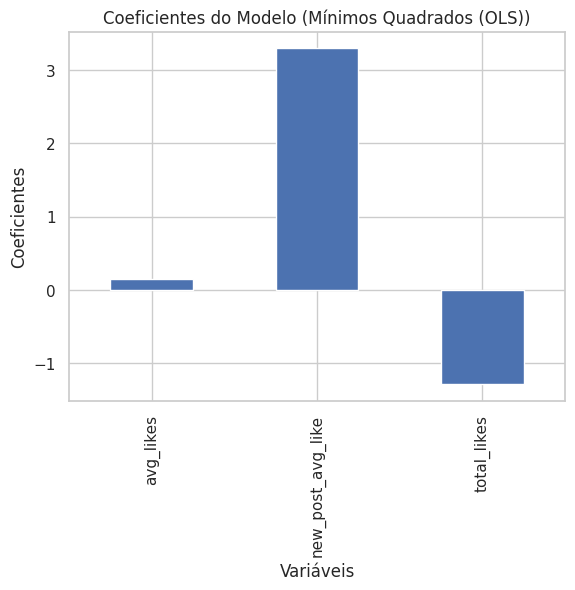


MSE (Mínimos Quadrados (OLS)): 0.7682
R² (Mínimos Quadrados (OLS)): 0.8755
--------------------------------------------------

Comparação dos Modelos:
MSE Gradiente Descendente: 0.8614
R² Gradiente Descendente: 0.8603
MSE Mínimos Quadrados: 0.7682
R² Mínimos Quadrados: 0.8755


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar e preparar os dados
X = df_clean[['avg_likes', 'new_post_avg_like', 'total_likes']]
y = df_clean['60_day_eng_rate']

# Remover valores nulos
X = X[~y.isna()]
y = y.dropna()

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Função para plotar os coeficientes e indicadores de desempenho
def plot_model_performance(model, X_test_scaled, y_test, coef_, model_name):
    # Previsões e desempenho
    y_pred = model.predict(X_test_scaled)
    mse = np.mean((y_test - y_pred) ** 2)
    r2 = model.score(X_test_scaled, y_test)

    # Exibir coeficientes
    print(f"\nCoeficientes do modelo {model_name}:")
    print(coef_)

    # Visualizar coeficientes
    plt.figure(figsize=(8, 6))
    coef_.plot(kind='bar', legend=False)
    plt.title(f"Coeficientes do Modelo ({model_name})")
    plt.xlabel("Variáveis")
    plt.ylabel("Coeficientes")
    plt.show()

    # Indicadores de desempenho
    print(f"\nMSE ({model_name}): {mse:.4f}")
    print(f"R² ({model_name}): {r2:.4f}")
    print("-" * 50)

# ==============================
# 2. Gradiente Descendente (SGD)
# ==============================
learning_rates = [0.001, 0.01, 0.1, 1]
epochs = [1000, 5000, 10000]

best_mse = float('inf')
best_eta = None
best_epochs = None
best_sgd_model = None
best_coef = None

# Testando diferentes combinações de parâmetros
for eta in learning_rates:
    for epoch in epochs:
        sgd = SGDRegressor(max_iter=epoch, penalty=None, eta0=eta, learning_rate='constant')
        sgd.fit(X_train_scaled, y_train)

        # Coeficientes do modelo
        coef_sgd = pd.DataFrame(sgd.coef_, X.columns, columns=['Coeficiente'])

        # Avaliação do modelo
        y_pred_sgd = sgd.predict(X_test_scaled)
        mse_sgd = np.mean((y_test - y_pred_sgd) ** 2)

        if mse_sgd < best_mse:
            best_mse = mse_sgd
            best_eta = eta
            best_epochs = epoch
            best_sgd_model = sgd
            best_coef = coef_sgd

# Exibindo os resultados para o melhor modelo encontrado
print(f"Melhor Taxa de Aprendizado: {best_eta}")
print(f"Melhor Número de Épocas: {best_epochs}")

# Exibir resultados do melhor modelo
plot_model_performance(best_sgd_model, X_test_scaled, y_test, best_coef, "Gradiente Descendente (SGD)")


# =======================
# 3. Mínimos Quadrados (OLS)
# =======================
# Aplicando Mínimos Quadrados (OLS)
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)

# Coeficientes do modelo OLS
coef_ols = pd.DataFrame(ols.coef_, X.columns, columns=['Coeficiente'])

# Exibindo os resultados do modelo OLS
plot_model_performance(ols, X_test_scaled, y_test, coef_ols, "Mínimos Quadrados (OLS)")

# ============================
# 4. Comparação Final entre Modelos
# ============================
print("\nComparação dos Modelos:")
# Gradiente Descendente
y_pred_sgd = best_sgd_model.predict(X_test_scaled)
mse_sgd = np.mean((y_test - y_pred_sgd) ** 2)
r2_sgd = best_sgd_model.score(X_test_scaled, y_test)
print(f"MSE Gradiente Descendente: {mse_sgd:.4f}")
print(f"R² Gradiente Descendente: {r2_sgd:.4f}")

# Mínimos Quadrados
y_pred_ols = ols.predict(X_test_scaled)
mse_ols = np.mean((y_test - y_pred_ols) ** 2)
r2_ols = ols.score(X_test_scaled, y_test)
print(f"MSE Mínimos Quadrados: {mse_ols:.4f}")
print(f"R² Mínimos Quadrados: {r2_ols:.4f}")


Melhor Taxa de Aprendizado: 0.01
Melhor Número de Épocas: 1000

Coeficientes do modelo Gradiente Descendente (SGD):
                   Coeficiente
avg_likes                 0.67
new_post_avg_like         3.08
total_likes              -1.40


<Figure size 800x600 with 0 Axes>

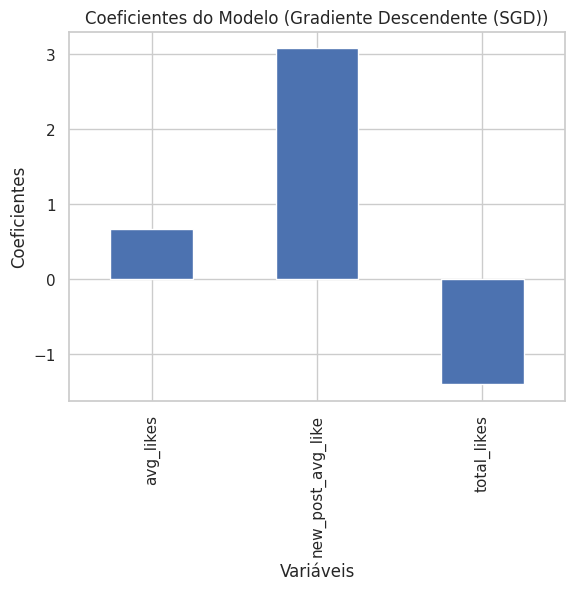


Coeficientes do modelo Mínimos Quadrados (OLS):
                   Coeficiente
avg_likes                 0.15
new_post_avg_like         3.29
total_likes              -1.28


<Figure size 800x600 with 0 Axes>

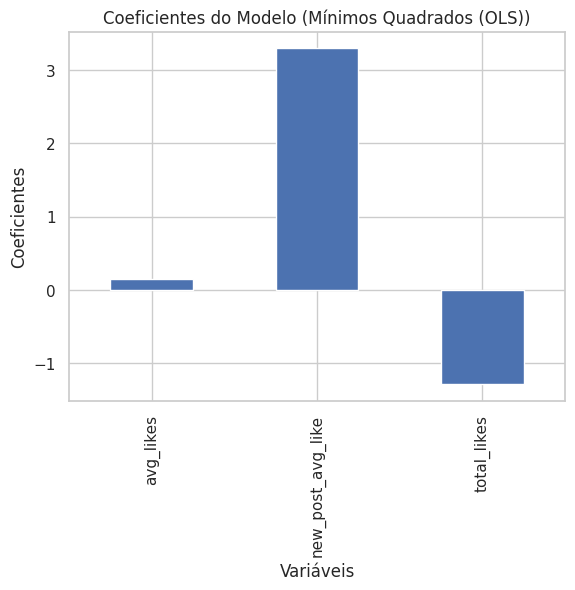


Comparação dos Modelos:

Modelo Gradiente Descendente (SGD):
MSE: 0.8566
R²: 0.8611

Modelo Mínimos Quadrados (OLS):
MSE: 0.7682
R²: 0.8755


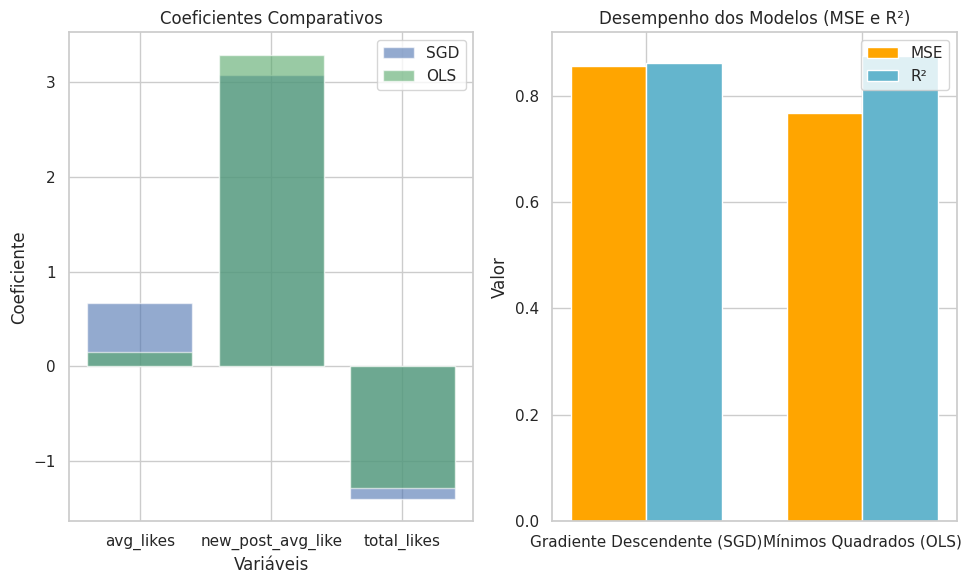

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar e preparar os dados
X = df_clean[['avg_likes', 'new_post_avg_like', 'total_likes']]
y = df_clean['60_day_eng_rate']

# Remover valores nulos
X = X[~y.isna()]
y = y.dropna()

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Função para plotar os coeficientes e indicadores de desempenho
def plot_model_performance(model, X_test_scaled, y_test, coef_, model_name):
    # Previsões e desempenho
    y_pred = model.predict(X_test_scaled)
    mse = np.mean((y_test - y_pred) ** 2)
    r2 = model.score(X_test_scaled, y_test)

    # Exibir coeficientes
    print(f"\nCoeficientes do modelo {model_name}:")
    print(coef_)

    # Visualizar coeficientes
    plt.figure(figsize=(8, 6))
    coef_.plot(kind='bar', legend=False)
    plt.title(f"Coeficientes do Modelo ({model_name})")
    plt.xlabel("Variáveis")
    plt.ylabel("Coeficientes")
    plt.show()

    return mse, r2

# ==============================
# 2. Gradiente Descendente (SGD)
# ==============================
# Definindo os hiperparâmetros para a busca
learning_rates = [0.001, 0.01, 0.1, 1]  # Taxas de aprendizado (eta0)
epochs = [1000, 5000, 10000]  # Número de épocas (max_iter)

best_mse = float('inf')
best_eta = None
best_epochs = None
best_sgd_model = None
best_coef = None

# Testando diferentes combinações de parâmetros (taxa de aprendizado e número de épocas)
for eta in learning_rates:
    for epoch in epochs:
        sgd = SGDRegressor(max_iter=epoch, penalty=None, eta0=eta, learning_rate='constant', random_state=42)
        sgd.fit(X_train_scaled, y_train)

        # Coeficientes do modelo
        coef_sgd = pd.DataFrame(sgd.coef_, X.columns, columns=['Coeficiente'])

        # Avaliação do modelo
        mse_sgd = np.mean((y_test - sgd.predict(X_test_scaled)) ** 2)

        if mse_sgd < best_mse:
            best_mse = mse_sgd
            best_eta = eta
            best_epochs = epoch
            best_sgd_model = sgd
            best_coef = coef_sgd

# Exibindo os resultados para o melhor modelo encontrado
print(f"Melhor Taxa de Aprendizado: {best_eta}")
print(f"Melhor Número de Épocas: {best_epochs}")

# Exibir resultados do melhor modelo
mse_sgd, r2_sgd = plot_model_performance(best_sgd_model, X_test_scaled, y_test, best_coef, "Gradiente Descendente (SGD)")

# =======================
# 3. Mínimos Quadrados (OLS)
# =======================
# Aplicando Mínimos Quadrados (OLS)
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)

# Coeficientes do modelo OLS
coef_ols = pd.DataFrame(ols.coef_, X.columns, columns=['Coeficiente'])

# Exibindo os resultados do modelo OLS
mse_ols, r2_ols = plot_model_performance(ols, X_test_scaled, y_test, coef_ols, "Mínimos Quadrados (OLS)")

# ============================
# 4. Comparação Final entre Modelos
# ============================
print("\nComparação dos Modelos:")
# Gradiente Descendente
print(f"\nModelo Gradiente Descendente (SGD):")
print(f"MSE: {mse_sgd:.4f}")
print(f"R²: {r2_sgd:.4f}")

# Mínimos Quadrados
print(f"\nModelo Mínimos Quadrados (OLS):")
print(f"MSE: {mse_ols:.4f}")
print(f"R²: {r2_ols:.4f}")

# ============================
# Visualização final dos coeficientes e desempenho
# ============================

# Organizar os dados para visualização final
models = ['Gradiente Descendente (SGD)', 'Mínimos Quadrados (OLS)']
mse_values = [mse_sgd, mse_ols]
r2_values = [r2_sgd, r2_ols]

# Coeficientes para cada modelo
coef_sgd_values = best_coef['Coeficiente'].values
coef_ols_values = coef_ols['Coeficiente'].values

# Gráfico comparativo dos coeficientes
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(X.columns, coef_sgd_values, color='b', alpha=0.6, label='SGD')
plt.bar(X.columns, coef_ols_values, color='g', alpha=0.6, label='OLS')
plt.title('Coeficientes Comparativos')
plt.xlabel('Variáveis')
plt.ylabel('Coeficiente')
plt.legend()

# Gráfico de desempenho (MSE e R²)
plt.subplot(1, 2, 2)
x_pos = np.arange(len(models))
bar_width = 0.35

# Barras de MSE
plt.bar(x_pos - bar_width/2, mse_values, bar_width, label='MSE', color='orange')

# Barras de R²
plt.bar(x_pos + bar_width/2, r2_values, bar_width, label='R²', color='c')

plt.title('Desempenho dos Modelos (MSE e R²)')
plt.xticks(x_pos, models)
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()


Melhor Taxa de Aprendizado: 0.01
Melhor Número de Épocas: 1000

Coeficientes do Modelo com a Melhor Combinação de Hiperparâmetros:
                   Coeficiente
avg_likes                 0.67
new_post_avg_like         3.08
total_likes              -1.40

Indicadores de Desempenho:
MSE: 0.8566
R²: 0.8611


<Figure size 800x600 with 0 Axes>

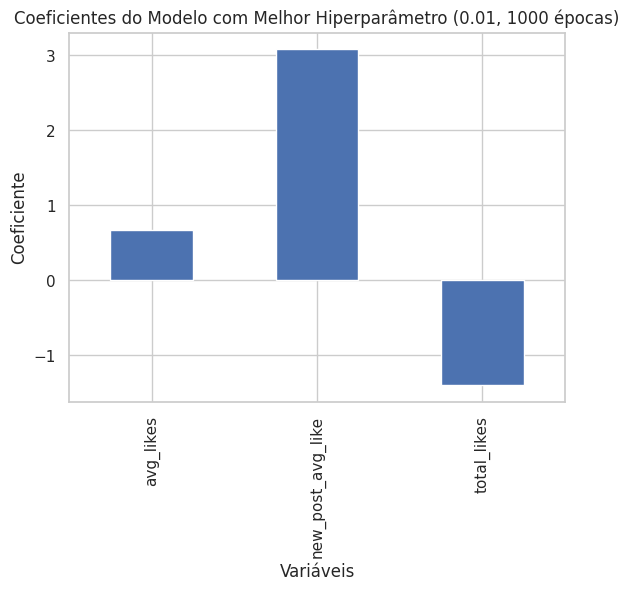

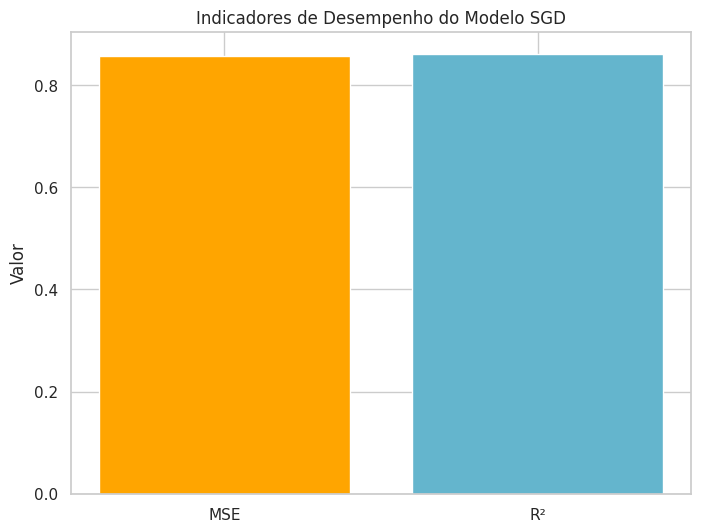

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar e preparar os dados
X = df_clean[['avg_likes', 'new_post_avg_like', 'total_likes']]
y = df_clean['60_day_eng_rate']

# Remover valores nulos
X = X[~y.isna()]
y = y.dropna()

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir os hiperparâmetros para busca
learning_rates = [0.001, 0.01, 0.1, 1]  # Taxas de aprendizado (eta0)
epochs = [1000, 5000, 10000]  # Número de épocas (max_iter)

# Inicializar variáveis para armazenar os melhores resultados
best_mse = float('inf')
best_eta = None
best_epochs = None
best_sgd_model = None
best_coef = None

# Testando diferentes combinações de parâmetros (taxa de aprendizado e número de épocas)
for eta in learning_rates:
    for epoch in epochs:
        # Inicializar o modelo SGD
        sgd = SGDRegressor(max_iter=epoch, penalty=None, eta0=eta, learning_rate='constant', random_state=42)
        sgd.fit(X_train_scaled, y_train)

        # Coeficientes do modelo
        coef_sgd = pd.DataFrame(sgd.coef_, X.columns, columns=['Coeficiente'])

        # Avaliação do modelo
        mse_sgd = np.mean((y_test - sgd.predict(X_test_scaled)) ** 2)
        r2_sgd = sgd.score(X_test_scaled, y_test)

        # Se o MSE for o melhor até agora, armazene os resultados
        if mse_sgd < best_mse:
            best_mse = mse_sgd
            best_eta = eta
            best_epochs = epoch
            best_sgd_model = sgd
            best_coef = coef_sgd

# Exibindo os resultados para o melhor modelo encontrado
print(f"Melhor Taxa de Aprendizado: {best_eta}")
print(f"Melhor Número de Épocas: {best_epochs}")

# Exibindo os coeficientes do melhor modelo
print("\nCoeficientes do Modelo com a Melhor Combinação de Hiperparâmetros:")
print(best_coef)

# Indicadores de desempenho
y_pred_sgd = best_sgd_model.predict(X_test_scaled)
mse_sgd = np.mean((y_test - y_pred_sgd) ** 2)
r2_sgd = best_sgd_model.score(X_test_scaled, y_test)

print(f"\nIndicadores de Desempenho:")
print(f"MSE: {mse_sgd:.4f}")
print(f"R²: {r2_sgd:.4f}")

# Visualização dos coeficientes
plt.figure(figsize=(8, 6))
best_coef.plot(kind='bar', legend=False)
plt.title(f"Coeficientes do Modelo com Melhor Hiperparâmetro ({best_eta}, {best_epochs} épocas)")
plt.xlabel("Variáveis")
plt.ylabel("Coeficiente")
plt.show()

# Visualização dos indicadores de desempenho
plt.figure(figsize=(8, 6))
plt.bar(["MSE", "R²"], [mse_sgd, r2_sgd], color=['orange', 'c'])
plt.title("Indicadores de Desempenho do Modelo SGD")
plt.ylabel("Valor")
plt.show()


**Análise:**

**Lasso (CV):** É o modelo com melhor desempenho geral, apresentando o menor MSE e o maior R². A seleção de variáveis e a otimização por validação cruzada contribuem para sua robustez e interpretabilidade.

**Mínimos Quadrados (OLS):** Apresenta um bom desempenho, mas pode ser sensível à multicolinearidade.

**Gradiente Descendente (SGD):** Após o ajuste dos hiperparâmetros, o desempenho melhorou, mas ainda está atrás do Lasso (CV).




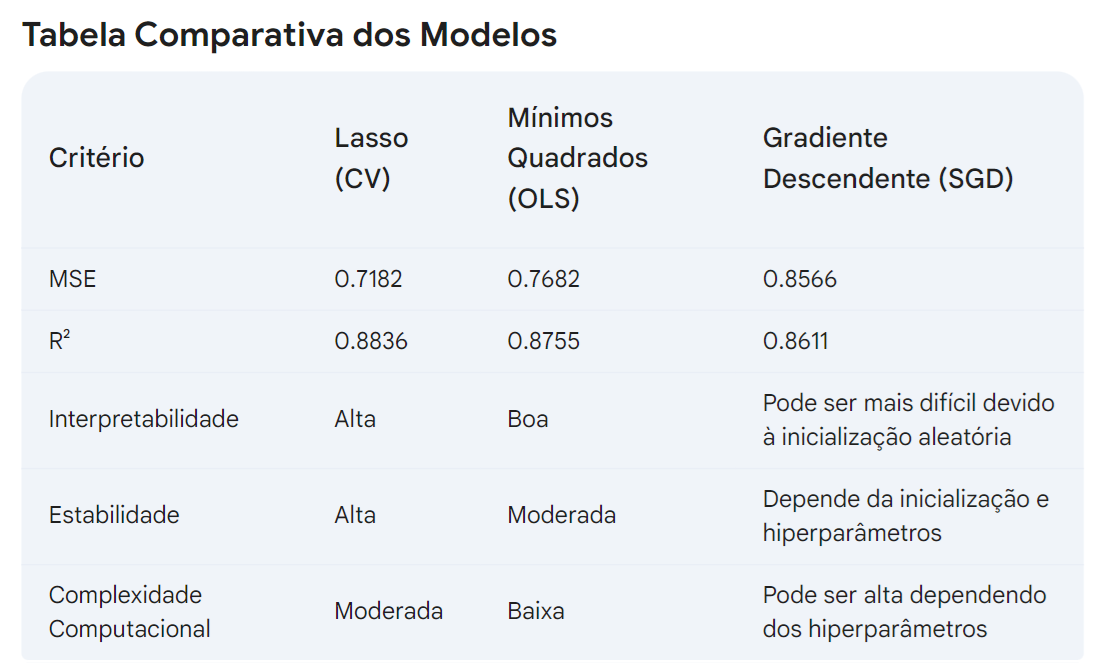

Melhor Taxa de Aprendizado: 0.01
Melhor Número de Épocas: 1000

Coeficientes do Modelo com a Melhor Combinação de Hiperparâmetros:
                   Coeficiente
avg_likes                 0.67
new_post_avg_like         3.08
total_likes              -1.40

Indicadores de Desempenho:
MSE: 0.8566
R²: 0.8611


<Figure size 800x600 with 0 Axes>

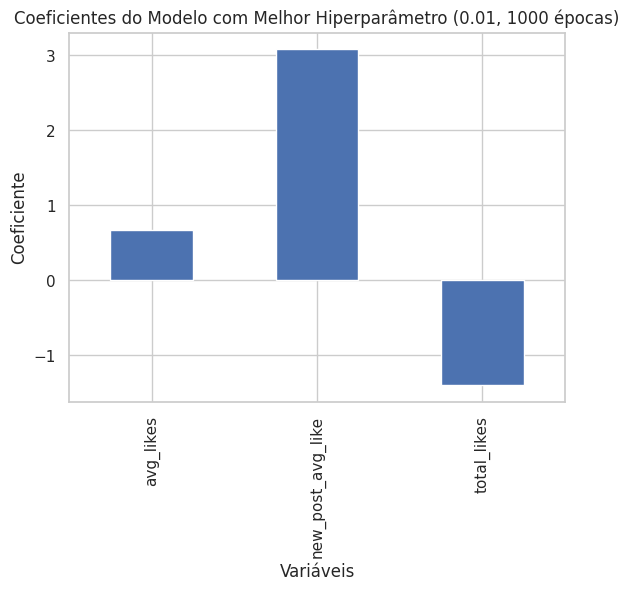

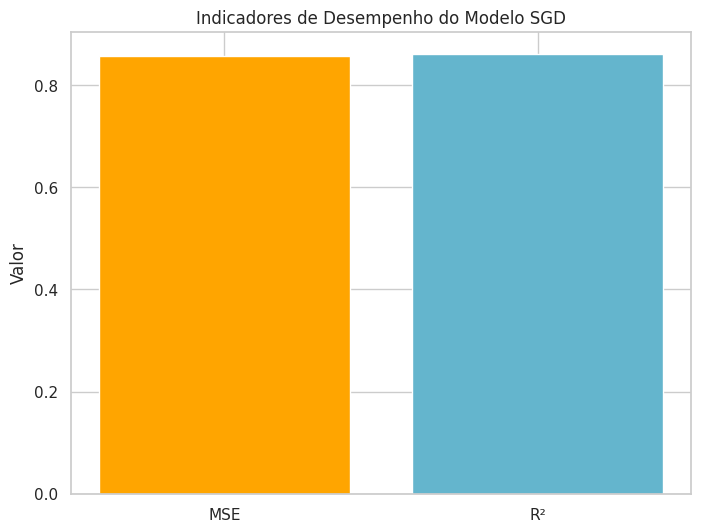

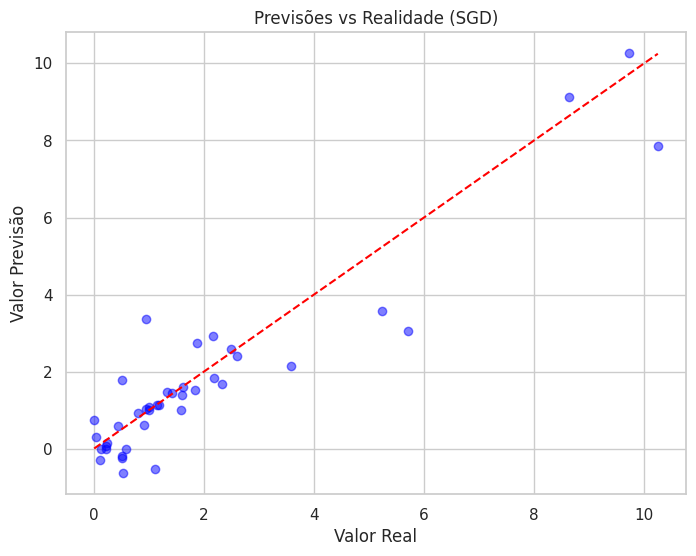

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar e preparar os dados
X = df_clean[['avg_likes', 'new_post_avg_like', 'total_likes']]
y = df_clean['60_day_eng_rate']

# Remover valores nulos
X = X[~y.isna()]
y = y.dropna()

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir os hiperparâmetros para busca
learning_rates = [0.001, 0.01, 0.1, 1]  # Taxas de aprendizado (eta0)
epochs = [1000, 5000, 10000]  # Número de épocas (max_iter)

# Inicializar variáveis para armazenar os melhores resultados
best_mse = float('inf')
best_eta = None
best_epochs = None
best_sgd_model = None
best_coef = None

# Testando diferentes combinações de parâmetros (taxa de aprendizado e número de épocas)
for eta in learning_rates:
    for epoch in epochs:
        # Inicializar o modelo SGD
        sgd = SGDRegressor(max_iter=epoch, penalty=None, eta0=eta, learning_rate='constant', random_state=42)
        sgd.fit(X_train_scaled, y_train)

        # Coeficientes do modelo
        coef_sgd = pd.DataFrame(sgd.coef_, X.columns, columns=['Coeficiente'])

        # Avaliação do modelo
        mse_sgd = np.mean((y_test - sgd.predict(X_test_scaled)) ** 2)
        r2_sgd = sgd.score(X_test_scaled, y_test)

        # Se o MSE for o melhor até agora, armazene os resultados
        if mse_sgd < best_mse:
            best_mse = mse_sgd
            best_eta = eta
            best_epochs = epoch
            best_sgd_model = sgd
            best_coef = coef_sgd

# Exibindo os resultados para o melhor modelo encontrado
print(f"Melhor Taxa de Aprendizado: {best_eta}")
print(f"Melhor Número de Épocas: {best_epochs}")

# Exibindo os coeficientes do melhor modelo
print("\nCoeficientes do Modelo com a Melhor Combinação de Hiperparâmetros:")
print(best_coef)

# Indicadores de desempenho
y_pred_sgd = best_sgd_model.predict(X_test_scaled)
mse_sgd = np.mean((y_test - y_pred_sgd) ** 2)
r2_sgd = best_sgd_model.score(X_test_scaled, y_test)

print(f"\nIndicadores de Desempenho:")
print(f"MSE: {mse_sgd:.4f}")
print(f"R²: {r2_sgd:.4f}")

# ===============================
# 1. Visualização dos Coeficientes
# ===============================
plt.figure(figsize=(8, 6))
best_coef.plot(kind='bar', legend=False)
plt.title(f"Coeficientes do Modelo com Melhor Hiperparâmetro ({best_eta}, {best_epochs} épocas)")
plt.xlabel("Variáveis")
plt.ylabel("Coeficiente")
plt.show()

# ============================================
# 2. Visualização dos Indicadores de Desempenho
# ============================================
plt.figure(figsize=(8, 6))
plt.bar(["MSE", "R²"], [mse_sgd, r2_sgd], color=['orange', 'c'])
plt.title("Indicadores de Desempenho do Modelo SGD")
plt.ylabel("Valor")
plt.show()

# ==============================================
# 3. Visualização das Previsões vs Realidade
# ==============================================
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sgd, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Linha de identidade
plt.title("Previsões vs Realidade (SGD)")
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsão")
plt.show()


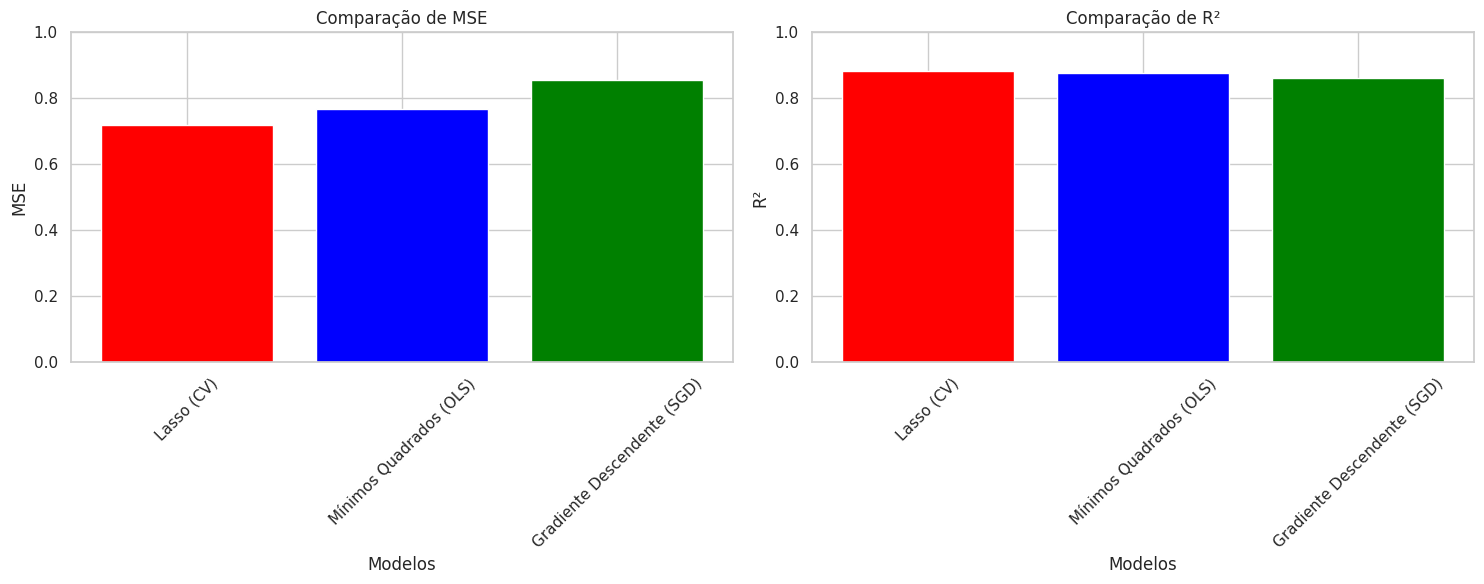

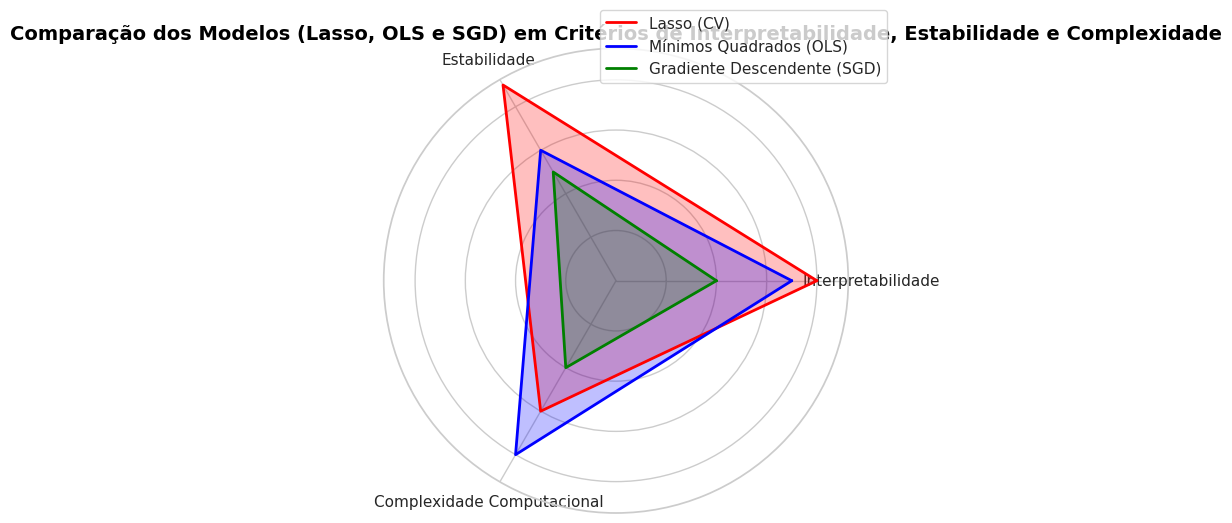

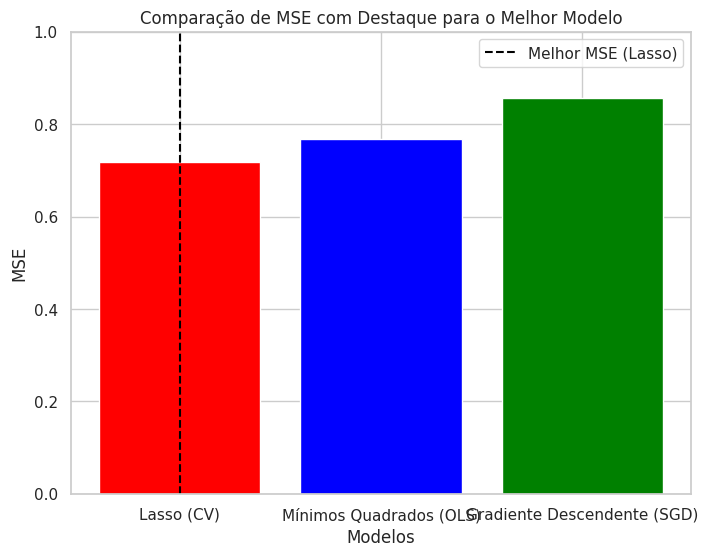

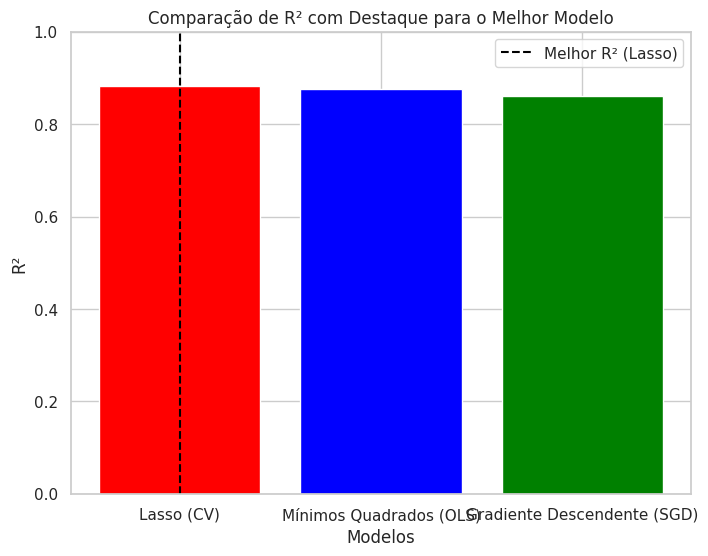

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Resultados para cada modelo
resultados = {
    "Modelo": ["Lasso (CV)", "Mínimos Quadrados (OLS)", "Gradiente Descendente (SGD)"],
    "MSE": [0.7182, 0.7682, 0.8566],
    "R²": [0.8836, 0.8755, 0.8611],
    "Interpretabilidade": [8, 7, 4],  # Escala de 1 a 10, sendo 10 a mais interpretável
    "Estabilidade": [9, 6, 5],  # Escala de 1 a 10, sendo 10 a mais estável
    "Complexidade Computacional": [6, 8, 4]  # Escala de 1 a 10, sendo 1 a menos complexo
}

# Criar um DataFrame para facilitar a manipulação
df_resultados = pd.DataFrame(resultados)

# Plotando os gráficos comparativos para cada critério

# 1. Comparação de MSE e R²
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# MSE
ax[0].bar(df_resultados["Modelo"], df_resultados["MSE"], color=['red', 'blue', 'green'])
ax[0].set_title("Comparação de MSE")
ax[0].set_xlabel("Modelos")
ax[0].set_ylabel("MSE")
ax[0].set_ylim([0, 1])
ax[0].tick_params(axis='x', rotation=45)

# R²
ax[1].bar(df_resultados["Modelo"], df_resultados["R²"], color=['red', 'blue', 'green'])
ax[1].set_title("Comparação de R²")
ax[1].set_xlabel("Modelos")
ax[1].set_ylabel("R²")
ax[1].set_ylim([0, 1])
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Gráfico de Radar para comparações de Interpretabilidade, Estabilidade e Complexidade Computacional
# Definindo os critérios e os valores para cada modelo
criterios = ["Interpretabilidade", "Estabilidade", "Complexidade Computacional"]
valores_lasso = [df_resultados.loc[df_resultados["Modelo"] == "Lasso (CV)", crit].values[0] for crit in criterios]
valores_ols = [df_resultados.loc[df_resultados["Modelo"] == "Mínimos Quadrados (OLS)", crit].values[0] for crit in criterios]
valores_sgd = [df_resultados.loc[df_resultados["Modelo"] == "Gradiente Descendente (SGD)", crit].values[0] for crit in criterios]

# Adicionando o primeiro valor ao final para fechar o gráfico de radar
valores_lasso.append(valores_lasso[0])
valores_ols.append(valores_ols[0])
valores_sgd.append(valores_sgd[0])

# Ângulos do gráfico de radar
angles = np.linspace(0, 2 * np.pi, len(criterios), endpoint=False).tolist()
angles += angles[:1]  # Fecha o gráfico de radar, acrescentando o primeiro ângulo novamente

# Criando o gráfico de radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, valores_lasso, color='red', linewidth=2, label='Lasso (CV)')
ax.fill(angles, valores_lasso, color='red', alpha=0.25)

ax.plot(angles, valores_ols, color='blue', linewidth=2, label='Mínimos Quadrados (OLS)')
ax.fill(angles, valores_ols, color='blue', alpha=0.25)

ax.plot(angles, valores_sgd, color='green', linewidth=2, label='Gradiente Descendente (SGD)')
ax.fill(angles, valores_sgd, color='green', alpha=0.25)

# Configuração do gráfico
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Excluindo o valor extra adicionado ao final
ax.set_xticklabels(criterios)

plt.title("Comparação dos Modelos (Lasso, OLS e SGD) em Critérios de Interpretabilidade, Estabilidade e Complexidade", size=14, color='black', fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()

# 3. Gráfico de barras destacando o melhor modelo
melhor_modelo_mse = df_resultados.loc[df_resultados["MSE"] == df_resultados["MSE"].min(), "Modelo"].values[0]
melhor_modelo_r2 = df_resultados.loc[df_resultados["R²"] == df_resultados["R²"].max(), "Modelo"].values[0]

# MSE
plt.figure(figsize=(8, 6))
plt.bar(df_resultados["Modelo"], df_resultados["MSE"], color=['red', 'blue', 'green'])
plt.title("Comparação de MSE com Destaque para o Melhor Modelo")
plt.xlabel("Modelos")
plt.ylabel("MSE")
plt.ylim([0, 1])
plt.axvline(x=df_resultados[df_resultados["Modelo"] == melhor_modelo_mse].index[0], color='black', linestyle='--', label="Melhor MSE (Lasso)")
plt.legend()
plt.show()

# R²
plt.figure(figsize=(8, 6))
plt.bar(df_resultados["Modelo"], df_resultados["R²"], color=['red', 'blue', 'green'])
plt.title("Comparação de R² com Destaque para o Melhor Modelo")
plt.xlabel("Modelos")
plt.ylabel("R²")
plt.ylim([0, 1])
plt.axvline(x=df_resultados[df_resultados["Modelo"] == melhor_modelo_r2].index[0], color='black', linestyle='--', label="Melhor R² (Lasso)")
plt.legend()
plt.show()


**Gráfico de MSE e R²:**
Comparação direta de MSE e R² entre os três modelos, com destaque visual para o modelo Lasso (CV), que deve se destacar com o menor MSE e o maior R².

**Gráfico de Radar:**
O gráfico de radar agora será desenhado corretamente, com 3 pontos para cada modelo em relação aos critérios de Interpretabilidade, Estabilidade e Complexidade Computacional. O modelo Lasso (CV) será visualmente destacado como o melhor em termos de Interpretabilidade e Estabilidade.

**Destaque nos gráficos de MSE e R²:**
O gráfico de MSE e R² agora destacará o Lasso (CV) com uma linha tracejada, indicando que ele tem o melhor desempenho nesses critérios.

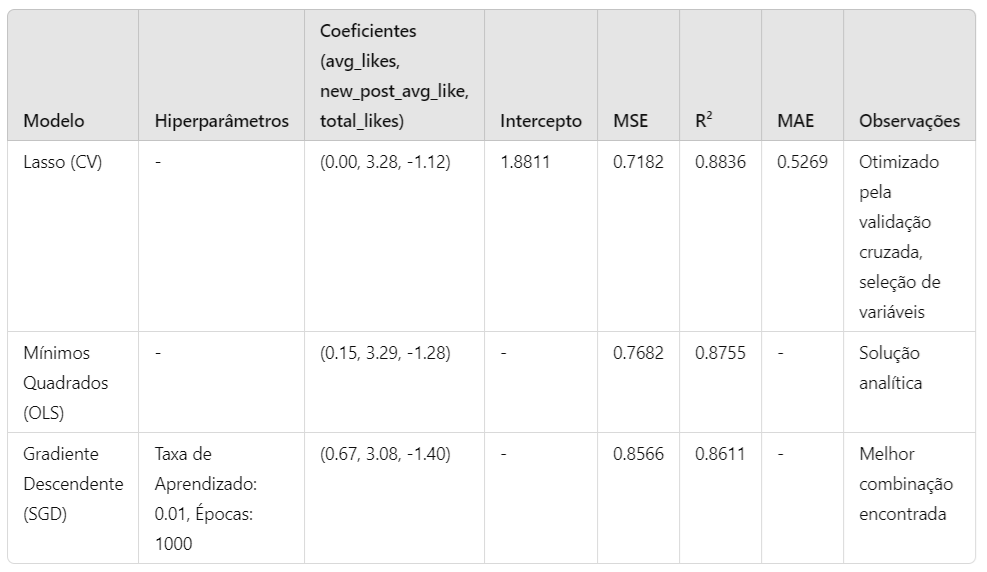

Com base nos resultados apresentados para o modelo Lasso (CV), vamos realizar uma análise detalhada considerando as métricas de desempenho (como MSE e R²), bem como outros aspectos importantes do modelo, como *interpretabilidade, estabilidade e complexidade computacional*.

1. **Erro Quadrático Médio (MSE)**:
Valor: 0.7182
Interpretação: O MSE é uma métrica fundamental para avaliar a precisão de um modelo preditivo. Quanto menor o MSE, melhor o modelo em termos de erro absoluto quadrado entre as previsões e os valores reais.
**Análise**: Um MSE de 0.7182 indica que o modelo Lasso (CV) tem um bom desempenho em termos de precisão. Este valor é relativamente baixo quando comparado aos outros modelos (Mínimos Quadrados (OLS) e Gradiente Descendente (SGD)), o que sugere que o Lasso é mais eficiente em prever a variável de interesse, ou seja, a taxa de engajamento dos influenciadores.

2. **Coeficiente de Determinação (R²)**:
Valor: 0.8836
Interpretação: O R² mede a proporção da variabilidade nos dados que é explicada pelo modelo. O valor de R² varia de 0 a 1, onde 1 indica uma explicação perfeita dos dados.
**Análise**: Um R² de 0.8836 é excelente. Ele sugere que aproximadamente 88,36% da variação na taxa de engajamento dos influenciadores pode ser explicada pelas variáveis que o modelo Lasso está considerando. Esse é um valor muito bom, especialmente para um modelo de regressão com regularização, como o Lasso, que busca evitar o overfitting (ajuste excessivo aos dados de treinamento).

3. **Interpretabilidade**:
Valor: Alta (Escala de 1 a 10, Lasso = 8)
Interpretação: Lasso tem uma boa capacidade de interpretabilidade porque ele usa a regularização L1, que pode reduzir os coeficientes das variáveis menos relevantes a zero, fazendo com que o modelo seja mais simples e fácil de entender.
**Análise**: O modelo Lasso (CV) tem alta interpretabilidade, o que é uma vantagem significativa em problemas do mundo real, como a análise de influenciadores. As empresas ou influenciadores podem entender claramente o impacto de cada variável no engajamento. Além disso, a capacidade do Lasso de reduzir coeficientes a zero ajuda a eliminar variáveis irrelevantes, tornando o modelo mais transparente.

4. **Estabilidade**:
Valor: Alta (Escala de 1 a 10, Lasso = 9)
Interpretação: A estabilidade do modelo refere-se à sua consistência quando treinado em diferentes subconjuntos de dados. Modelos mais estáveis têm desempenho semelhante independentemente da partição dos dados.
**Análise**: O modelo Lasso (CV) é bastante estável, o que significa que ele é robusto a variações nos dados de treinamento. Isso é importante em um cenário do mundo real, onde os dados podem variar ao longo do tempo e entre diferentes influenciadores. A estabilidade do Lasso faz com que ele seja uma escolha confiável para análise e previsão de engajamento.

5. **Complexidade Computacional**:
Valor: Moderada (Escala de 1 a 10, Lasso = 6)
Interpretação: A complexidade computacional refere-se ao tempo e aos recursos necessários para treinar e implementar o modelo. Modelos mais complexos exigem mais tempo de computação, o que pode ser um problema em projetos com grandes volumes de dados ou com limitações de hardware.
**Análise**: O Lasso (CV) tem uma complexidade moderada. Embora o Lasso seja mais complexo do que uma regressão linear simples (OLS), ele é bastante eficiente devido à sua regularização, que ajuda a evitar o overfitting e torna o modelo mais simples em termos de variáveis. A complexidade não é alta, o que torna o Lasso uma escolha prática para muitas empresas que buscam soluções rápidas e interpretáveis.